
# **Análisis de datos para la optimización de producción** <br>
Contiene <br>
**1.- Exploración de datos.**<br>
**2.- Outliers y Normalización de datos.** <br>
**3.- Análisis de correlación entre las variables.** <br>
**4.-Visualización de dependencias causales.** <br>
**5.- Mix óptimo EE y EC.**
**6.- Visualización de errores.** <br>
**7.- Métricas de evaluación.** <br>
**8.- Cálculo de ahorro.** <br>
**9.- Serialización con Pickle.** <br>

Se importan las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.gofplots import qqplot
from plotly.offline import iplot
import plotly.graph_objs as go
from numpy.random import seed, randn
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.express as px
from xgboost.sklearn import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from dataclasses import make_dataclass
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

Se lee el archivo con los datos y se comienza con la exploración de los datos.

In [40]:
df = pd.read_csv('datos_tec.csv')

In [3]:
df.describe()

Dureza    Tasa_Prod          Asp           EC           EE  \
count  9391.000000  9392.000000  9391.000000  9392.000000  9392.000000   
mean    104.028644   391.005111     3.152306    19.362425    19.059135   
std       2.049060    43.352777     0.375251     6.698657     8.035162   
min      80.000000     0.000000     0.090000     0.000000     0.000000   
25%     103.000000   383.000000     3.040000    15.900000    14.200000   
50%     104.000000   398.000000     3.260000    19.200000    20.000000   
75%     105.000000   408.000000     3.380000    23.500000    25.200000   
max     112.000000   480.000000     3.520000    40.400000    35.300000   

           Calidad  
count  9392.000000  
mean      0.089891  
std       0.048819  
min       0.000000  
25%       0.061000  
50%       0.081000  
75%       0.107000  
max       1.000000

In [4]:
print('Número de registros:',len(df))

Número de registros: 9392


Se buscan registros con valores nulos.

In [5]:
for i in range(len(df.columns)):
    print("Valores nulos en columna", df.columns[i], "=",len(df)-len(df.dropna(subset=[df.columns[i]])))

Valores nulos en columna TIME = 0
Valores nulos en columna Dureza = 1
Valores nulos en columna Tasa_Prod = 0
Valores nulos en columna Asp = 1
Valores nulos en columna EC = 0
Valores nulos en columna EE = 0
Valores nulos en columna Calidad = 0


Se grafican histogramas y gráficas de caja para conocer distribución y comportamiento de los datos.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


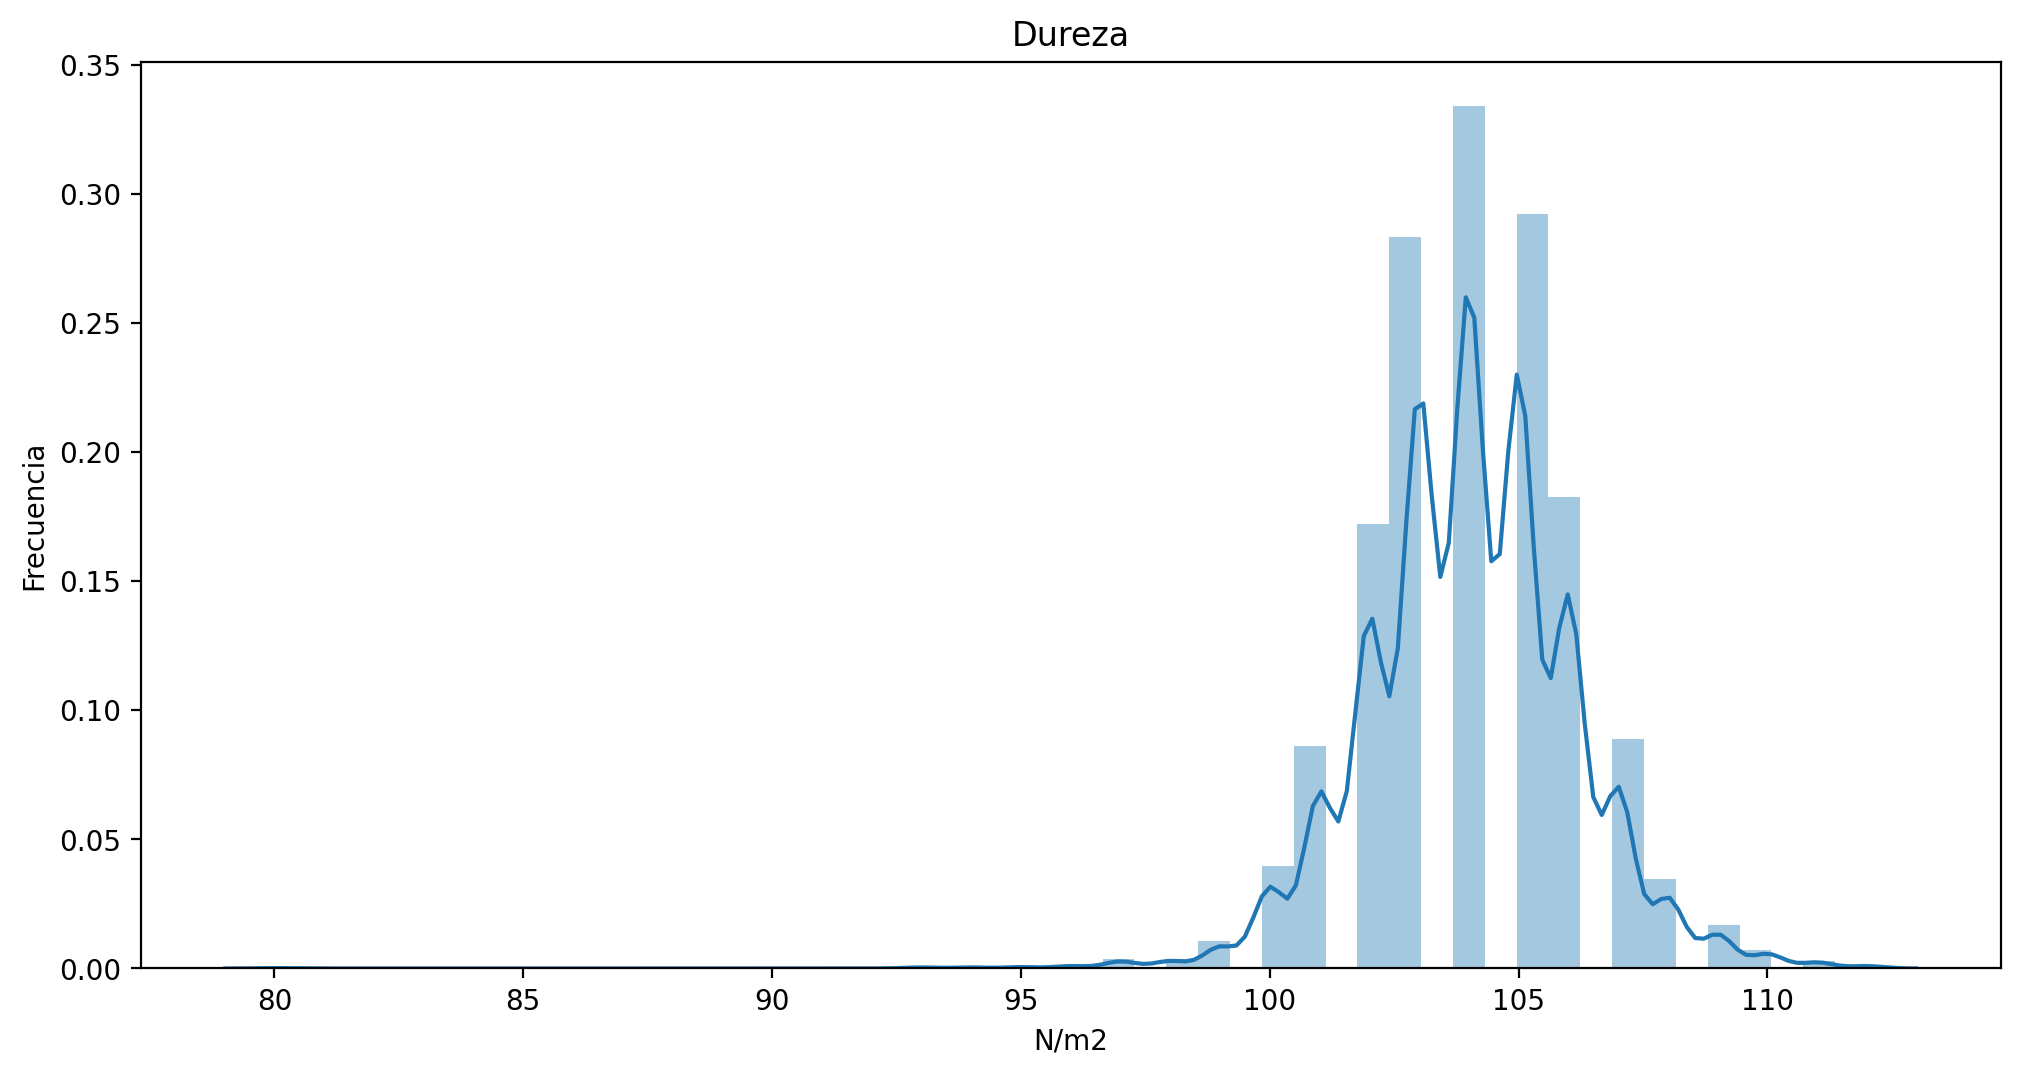

In [6]:
#Dureza
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['Dureza']
res = sn.distplot(data)
plt.title("Dureza")
plt.xlabel("N/m2")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='Dureza'>

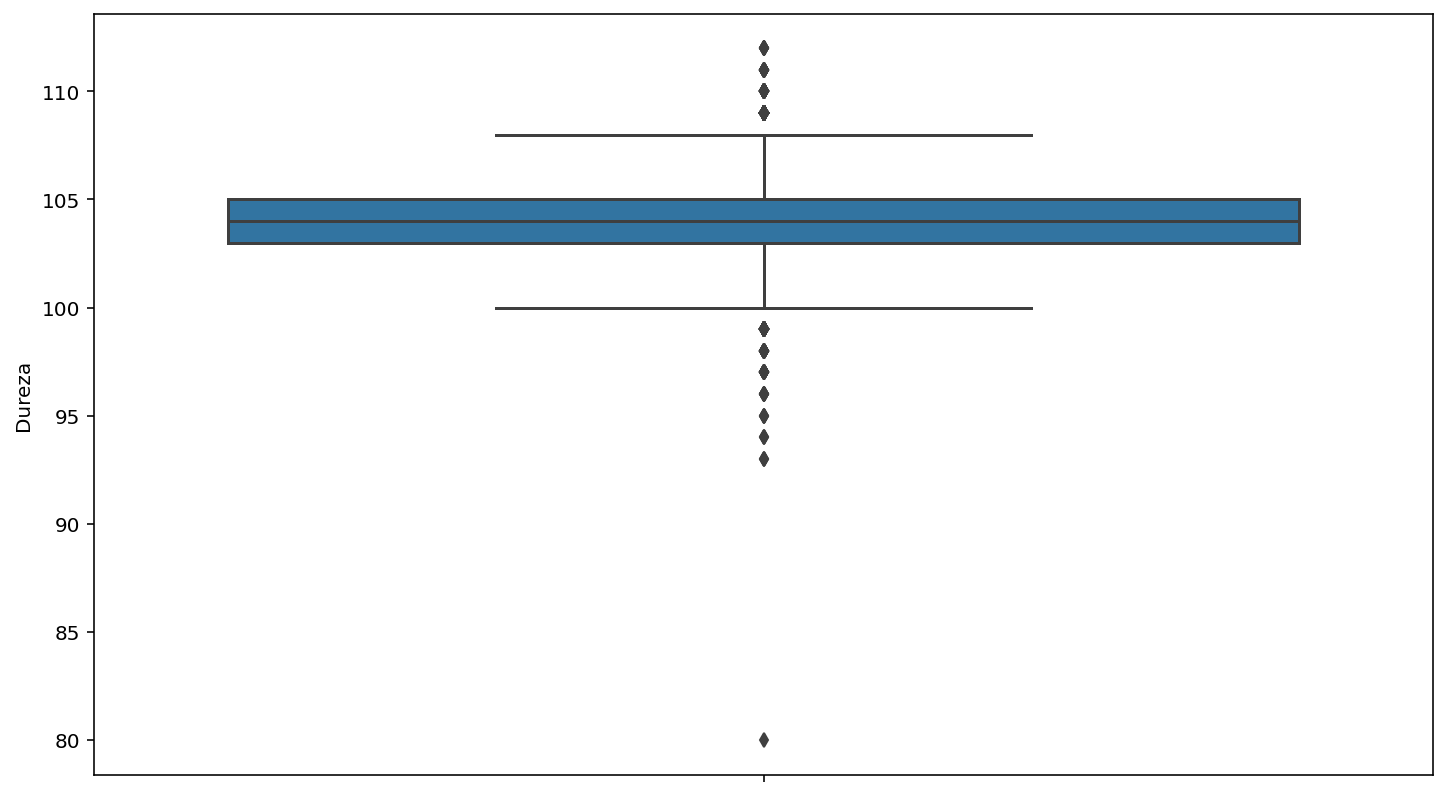

In [7]:
sns.boxplot(y = df['Dureza'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


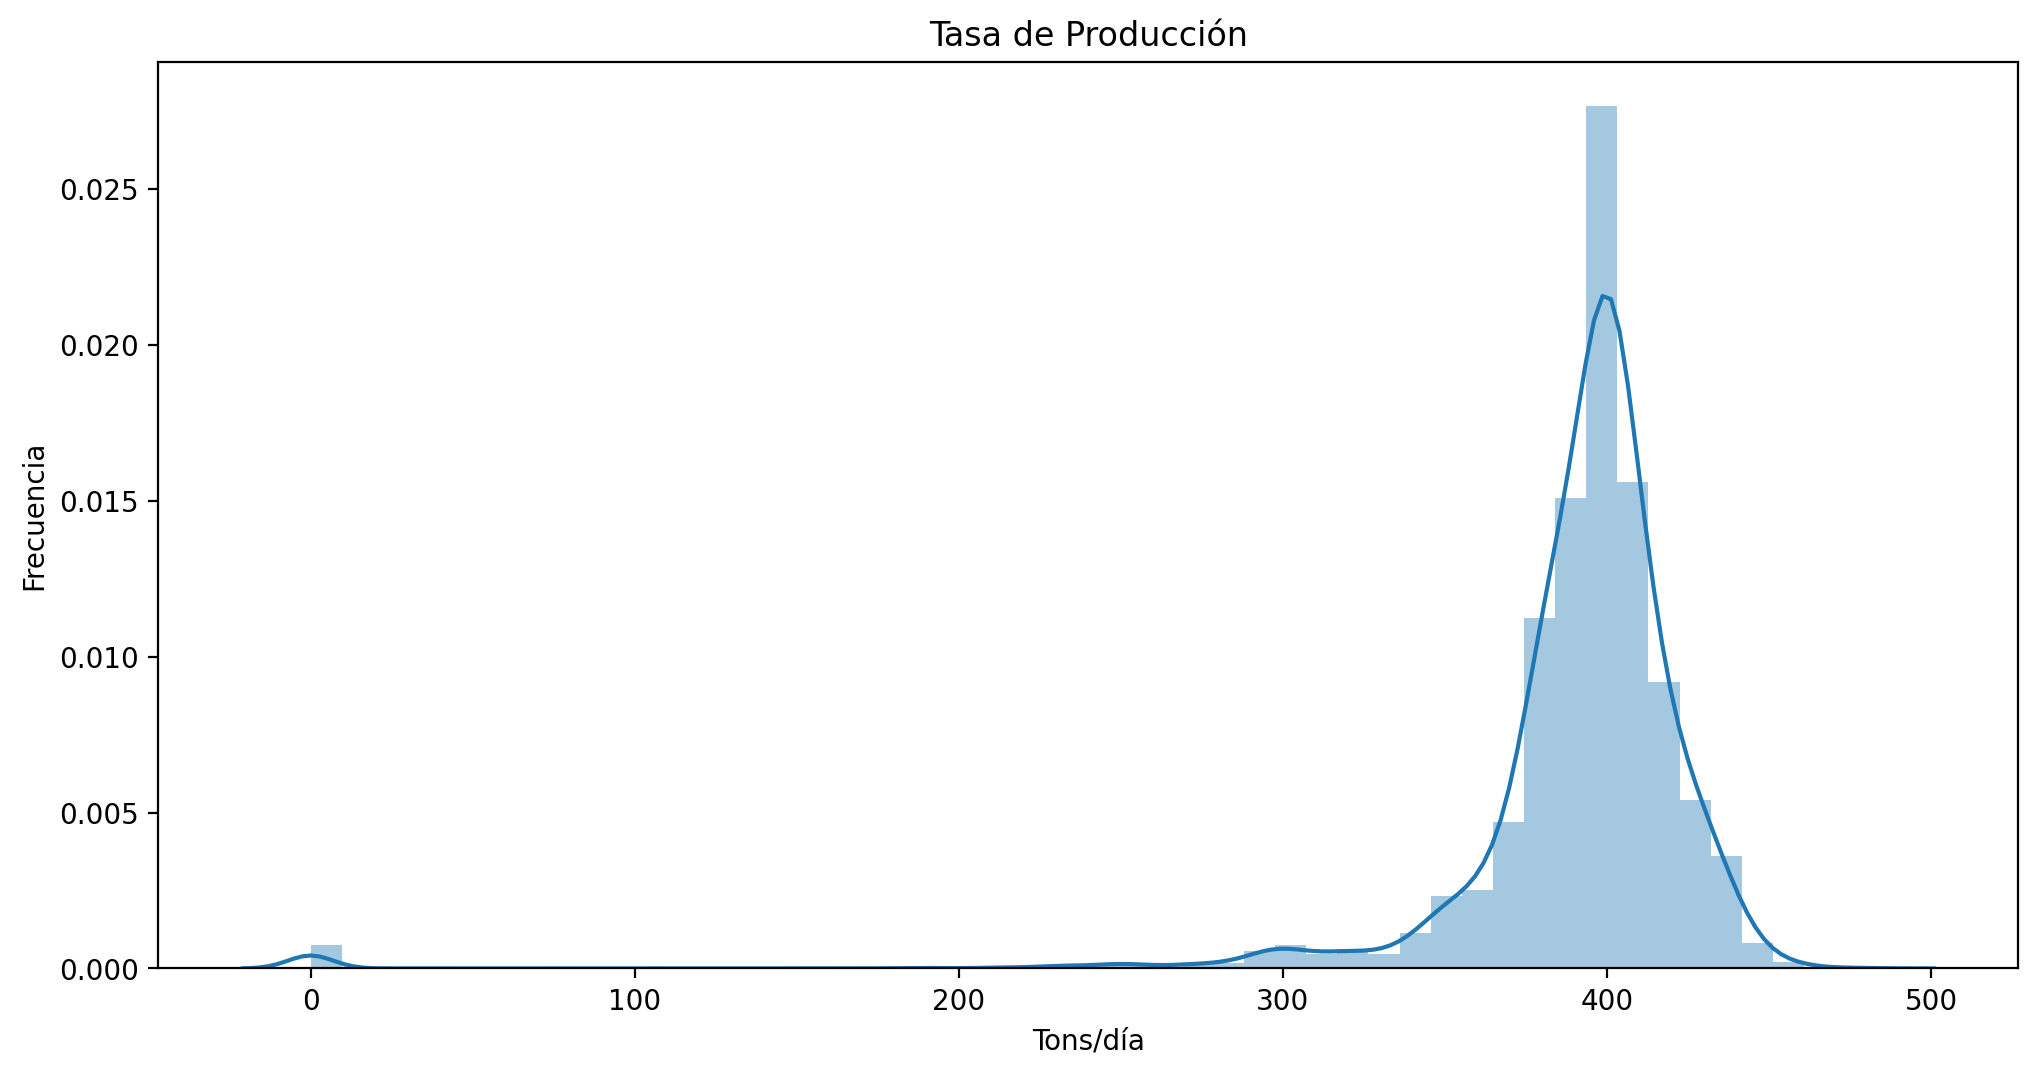

In [8]:
#Tasa de Producción
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['Tasa_Prod']
res = sn.distplot(data)
plt.title("Tasa de Producción")
plt.xlabel("Tons/día")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='Tasa_Prod'>

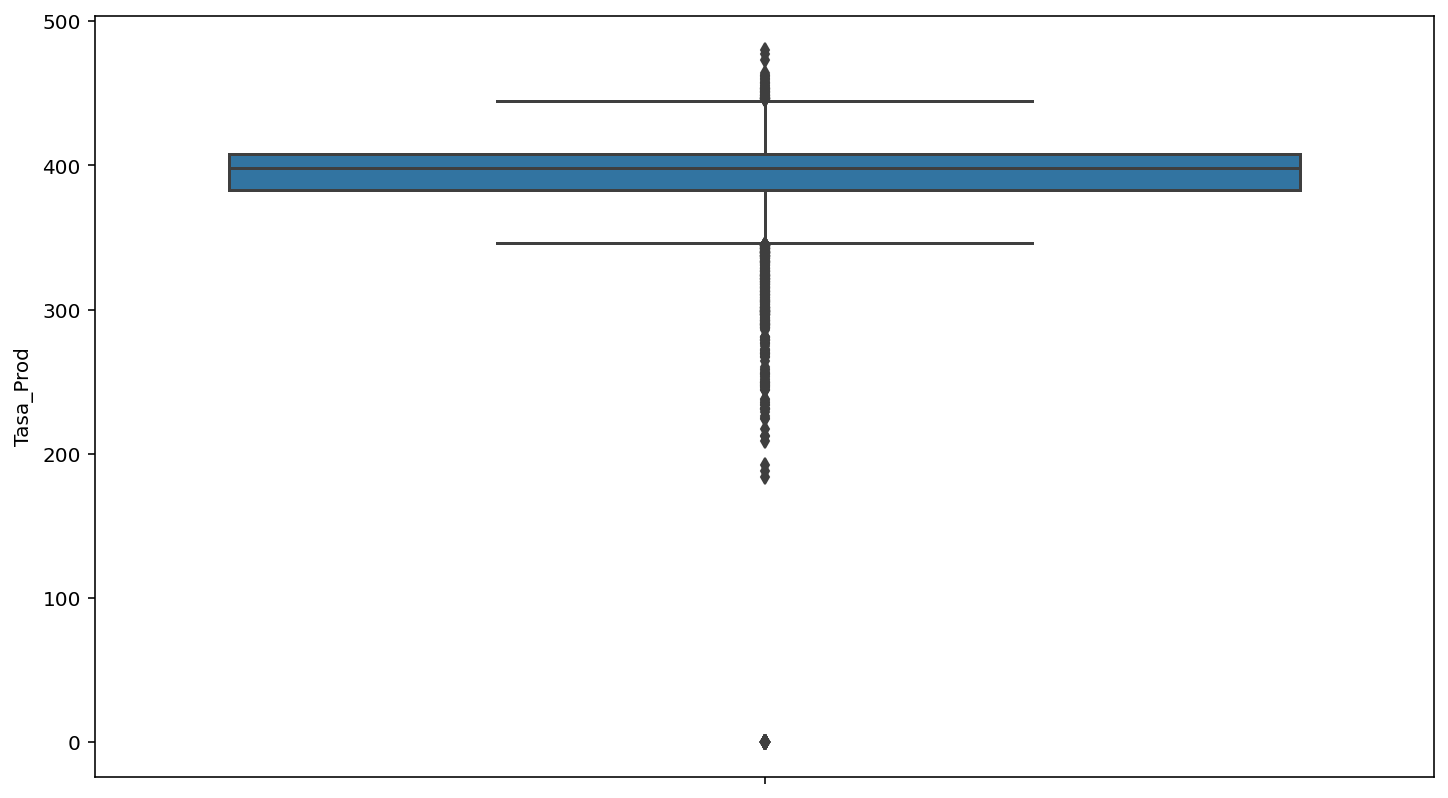

In [9]:
sns.boxplot(y = df['Tasa_Prod'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


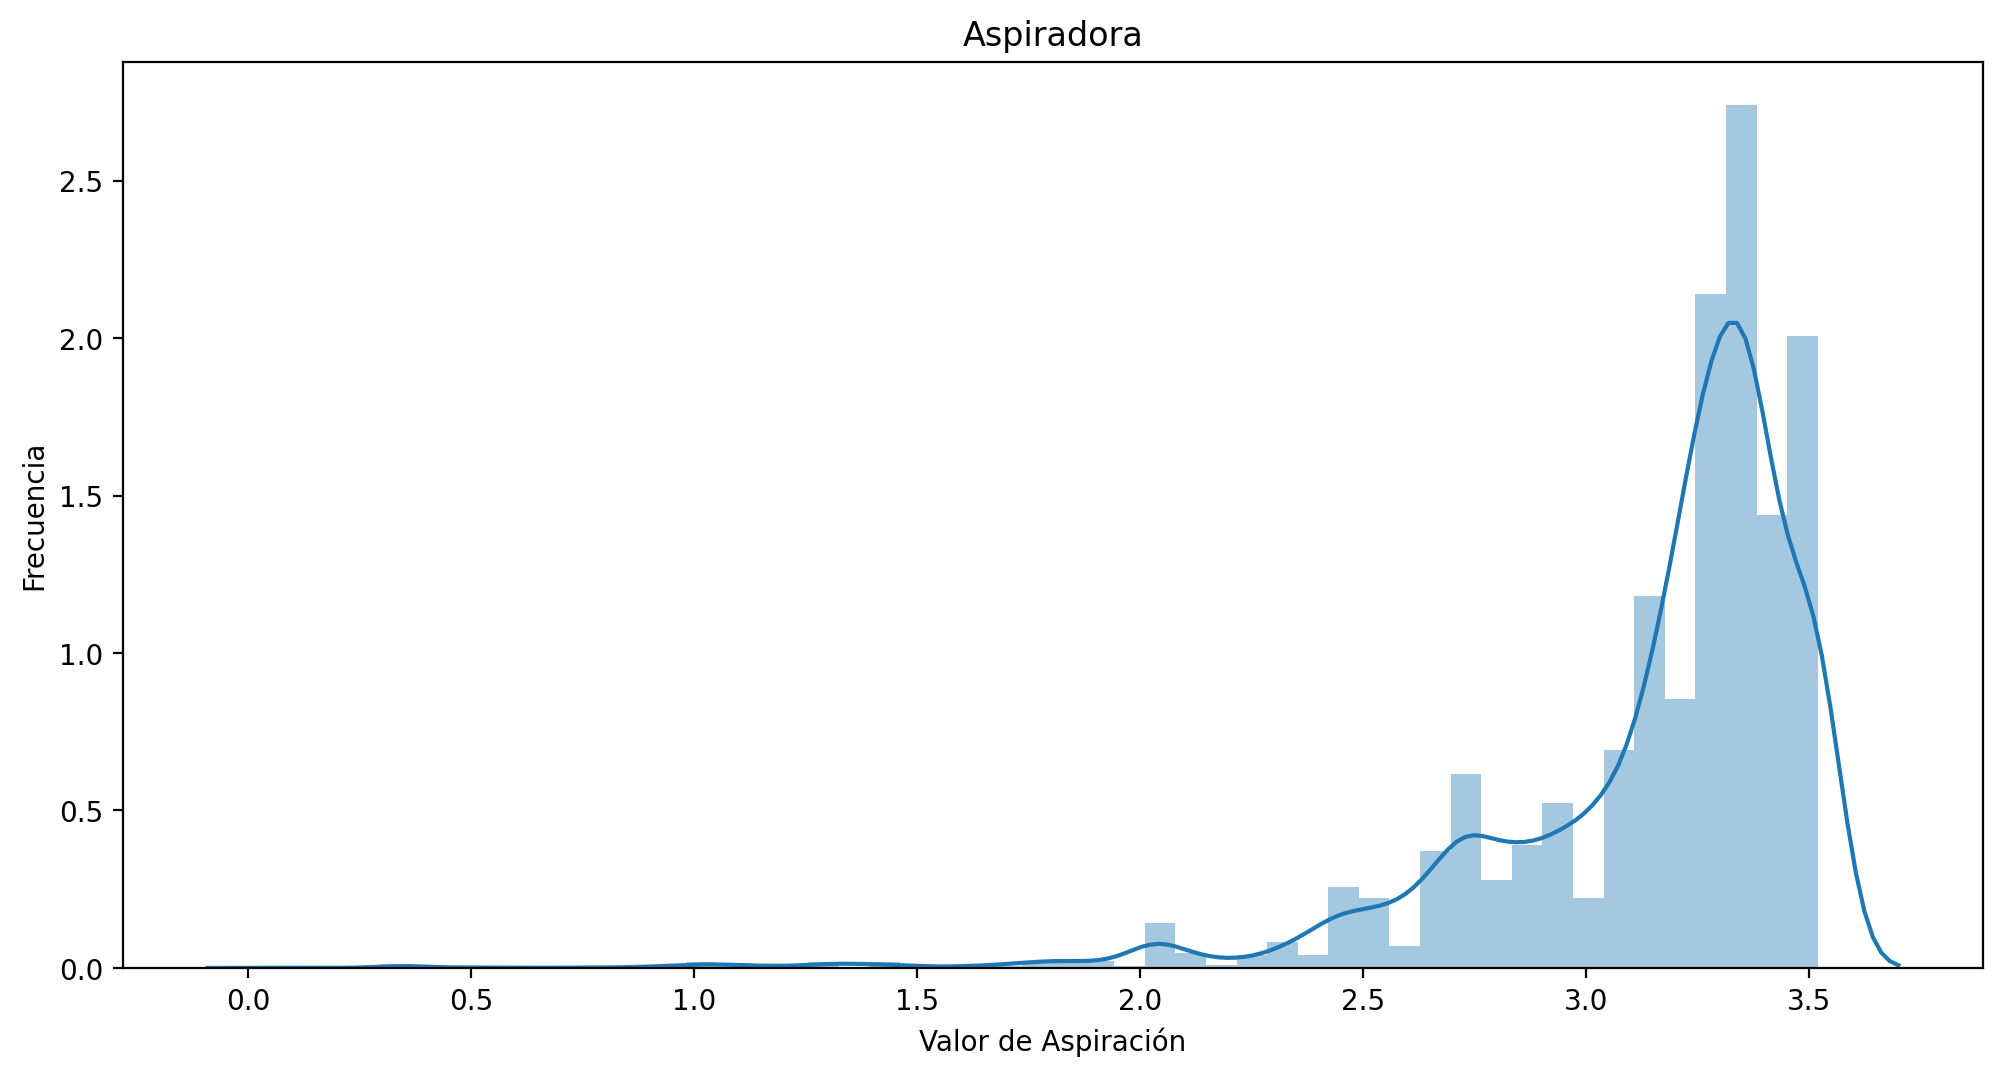

In [10]:
#Valor de Aspiración
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['Asp']
res = sn.distplot(data)
plt.title("Aspiradora")
plt.xlabel("Valor de Aspiración")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='Asp'>

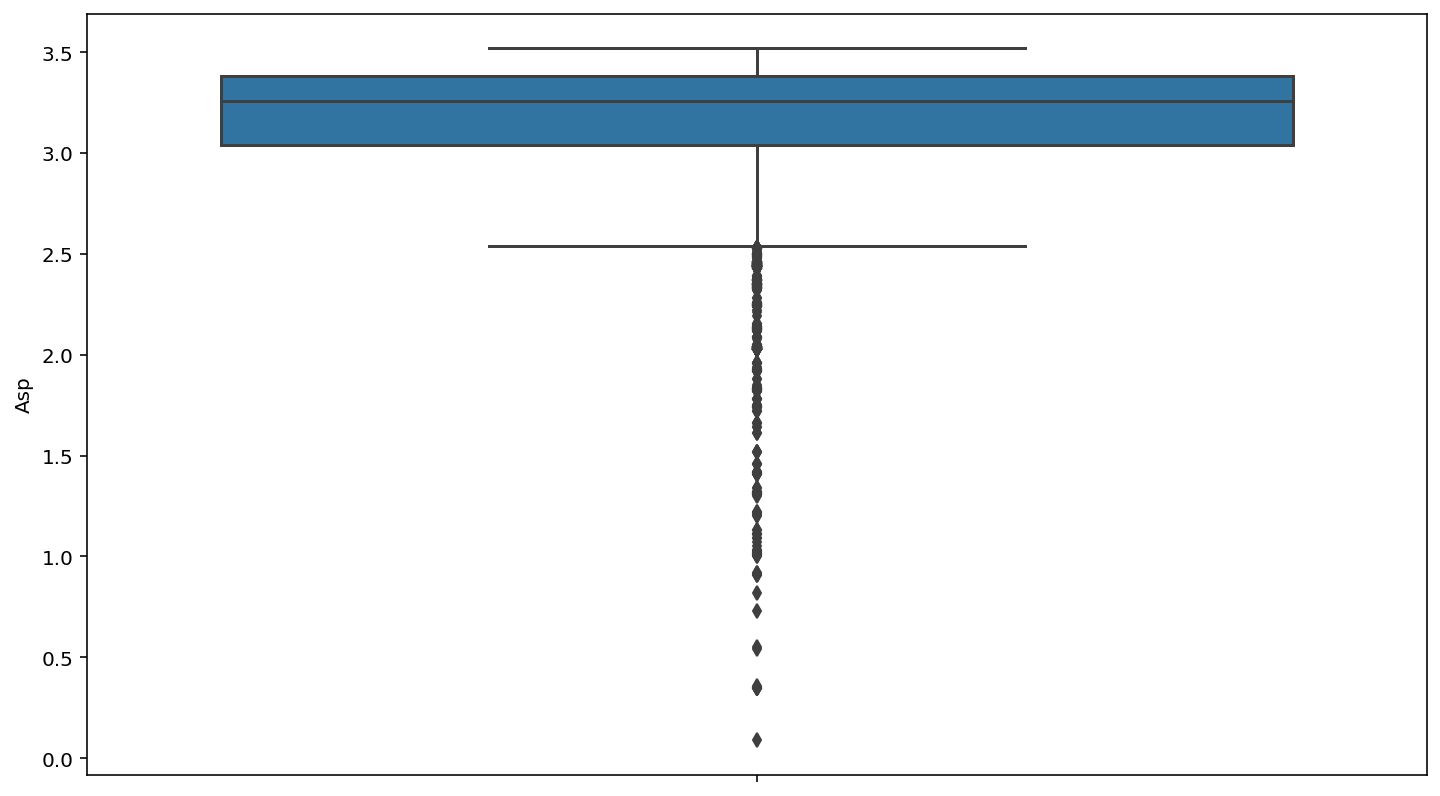

In [11]:
sns.boxplot(y = df['Asp'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


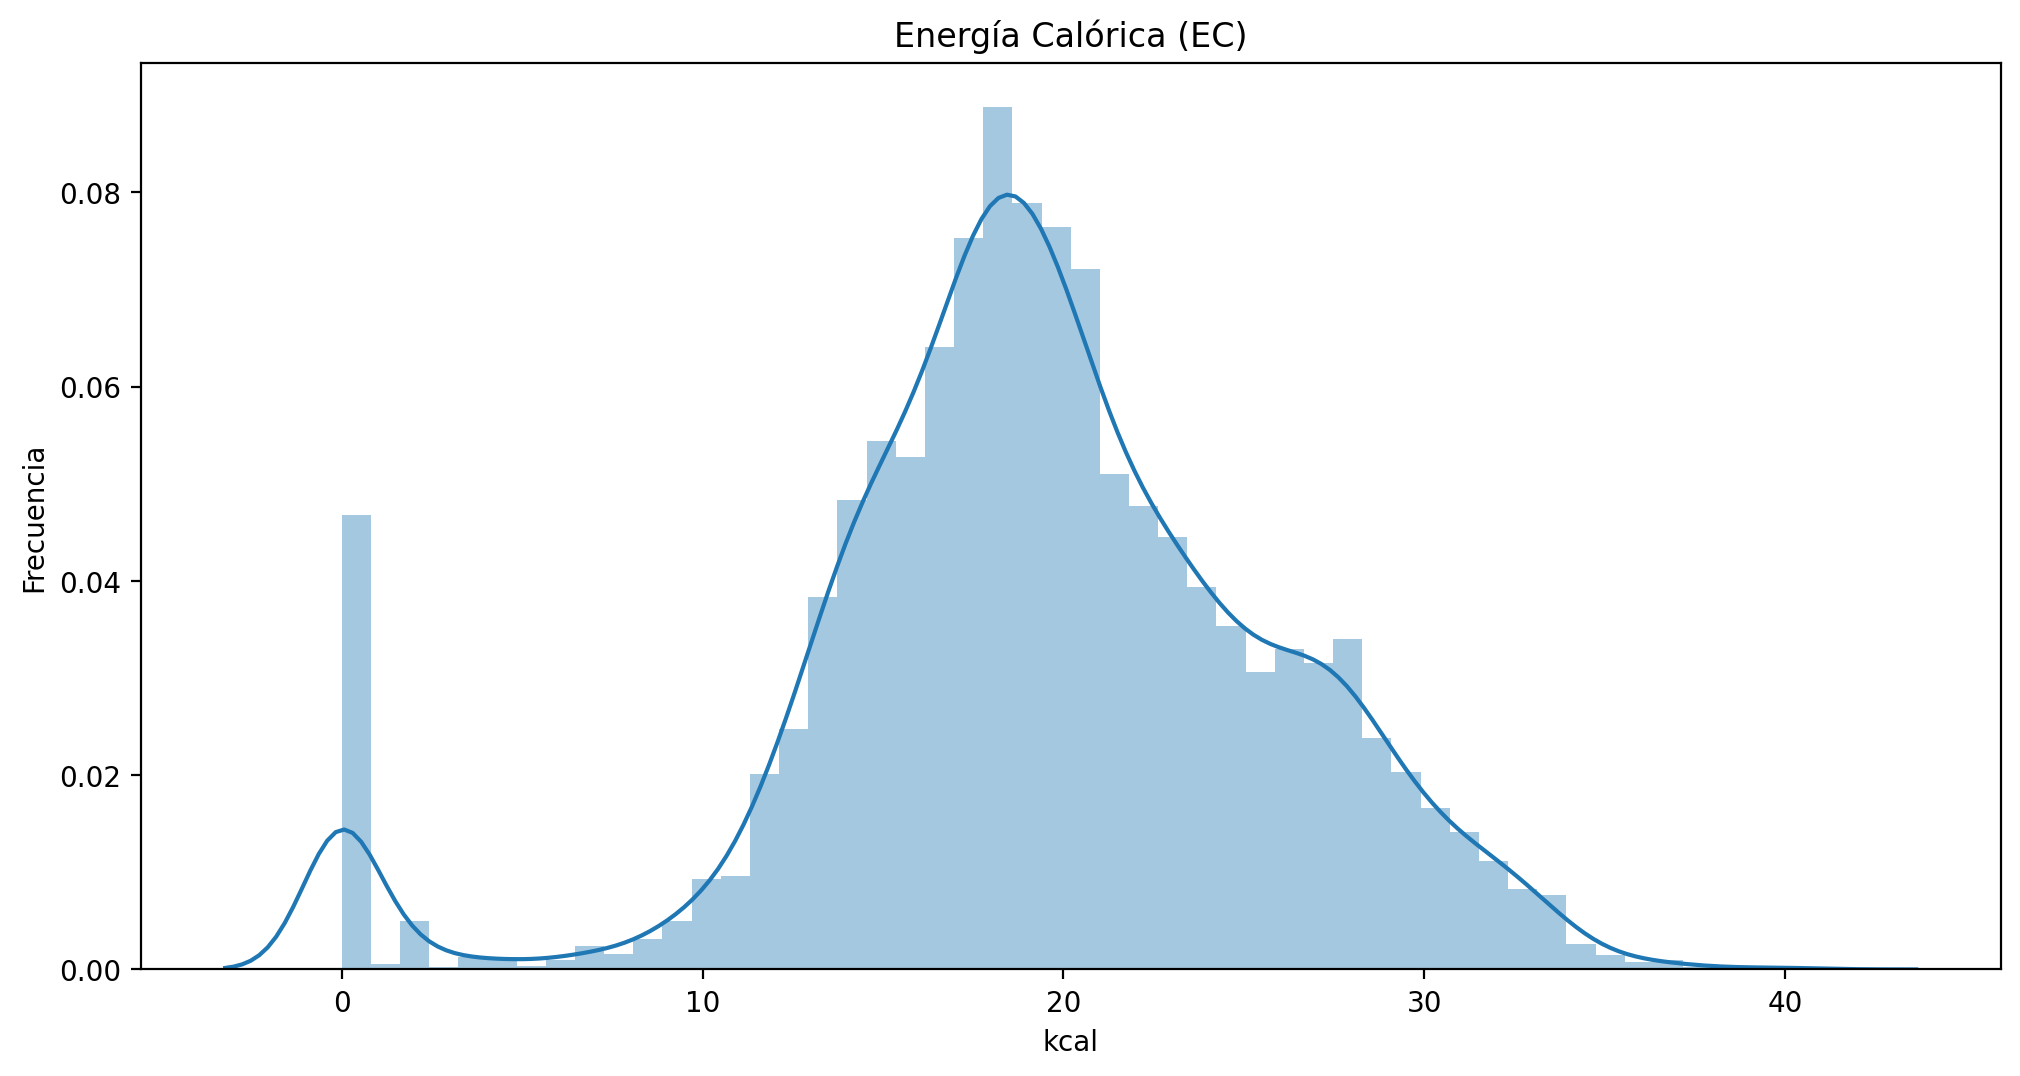

In [12]:
#Energía Calórica
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['EC']
res = sn.distplot(data)
plt.title("Energía Calórica (EC)")
plt.xlabel("kcal")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='EC'>

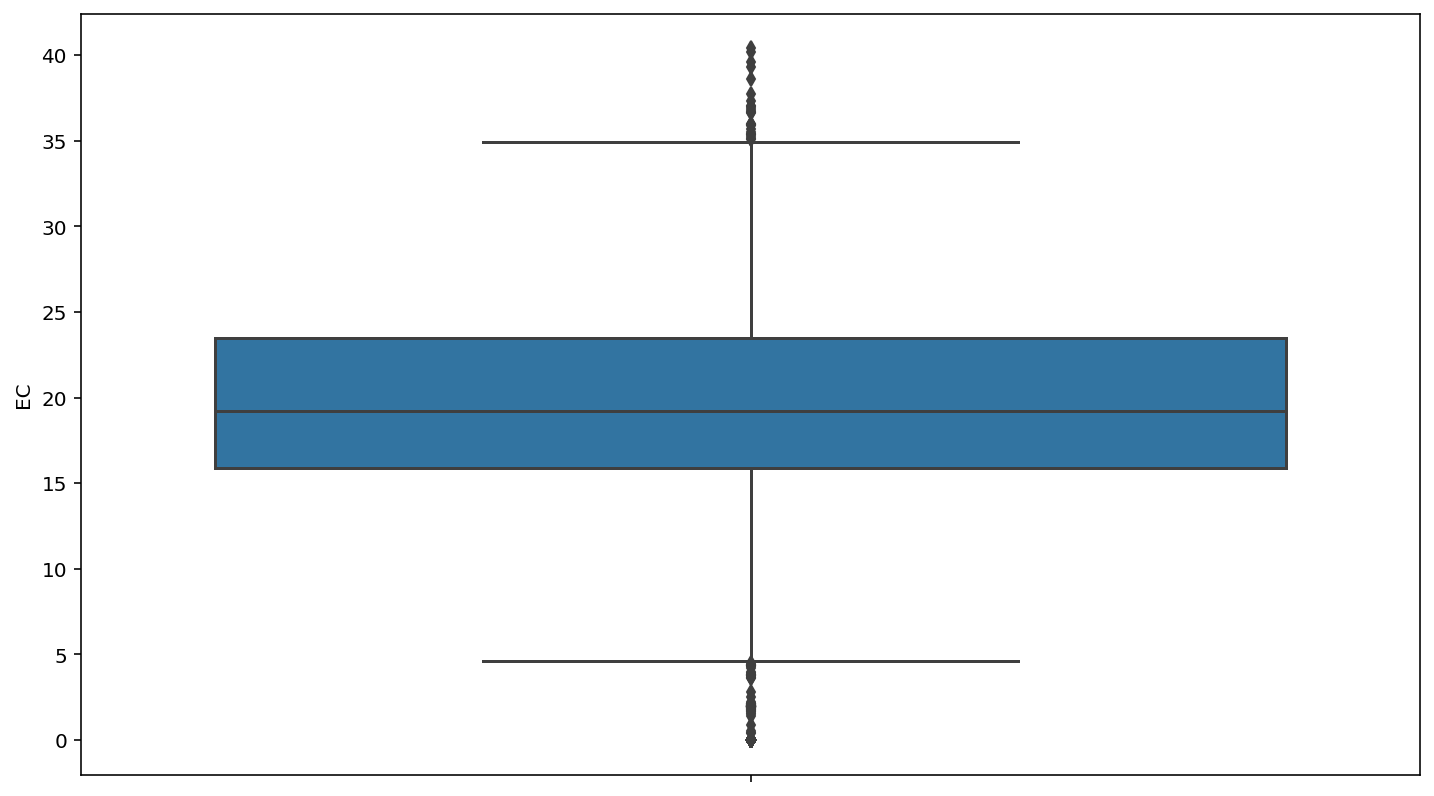

In [13]:
sns.boxplot(y = df['EC'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


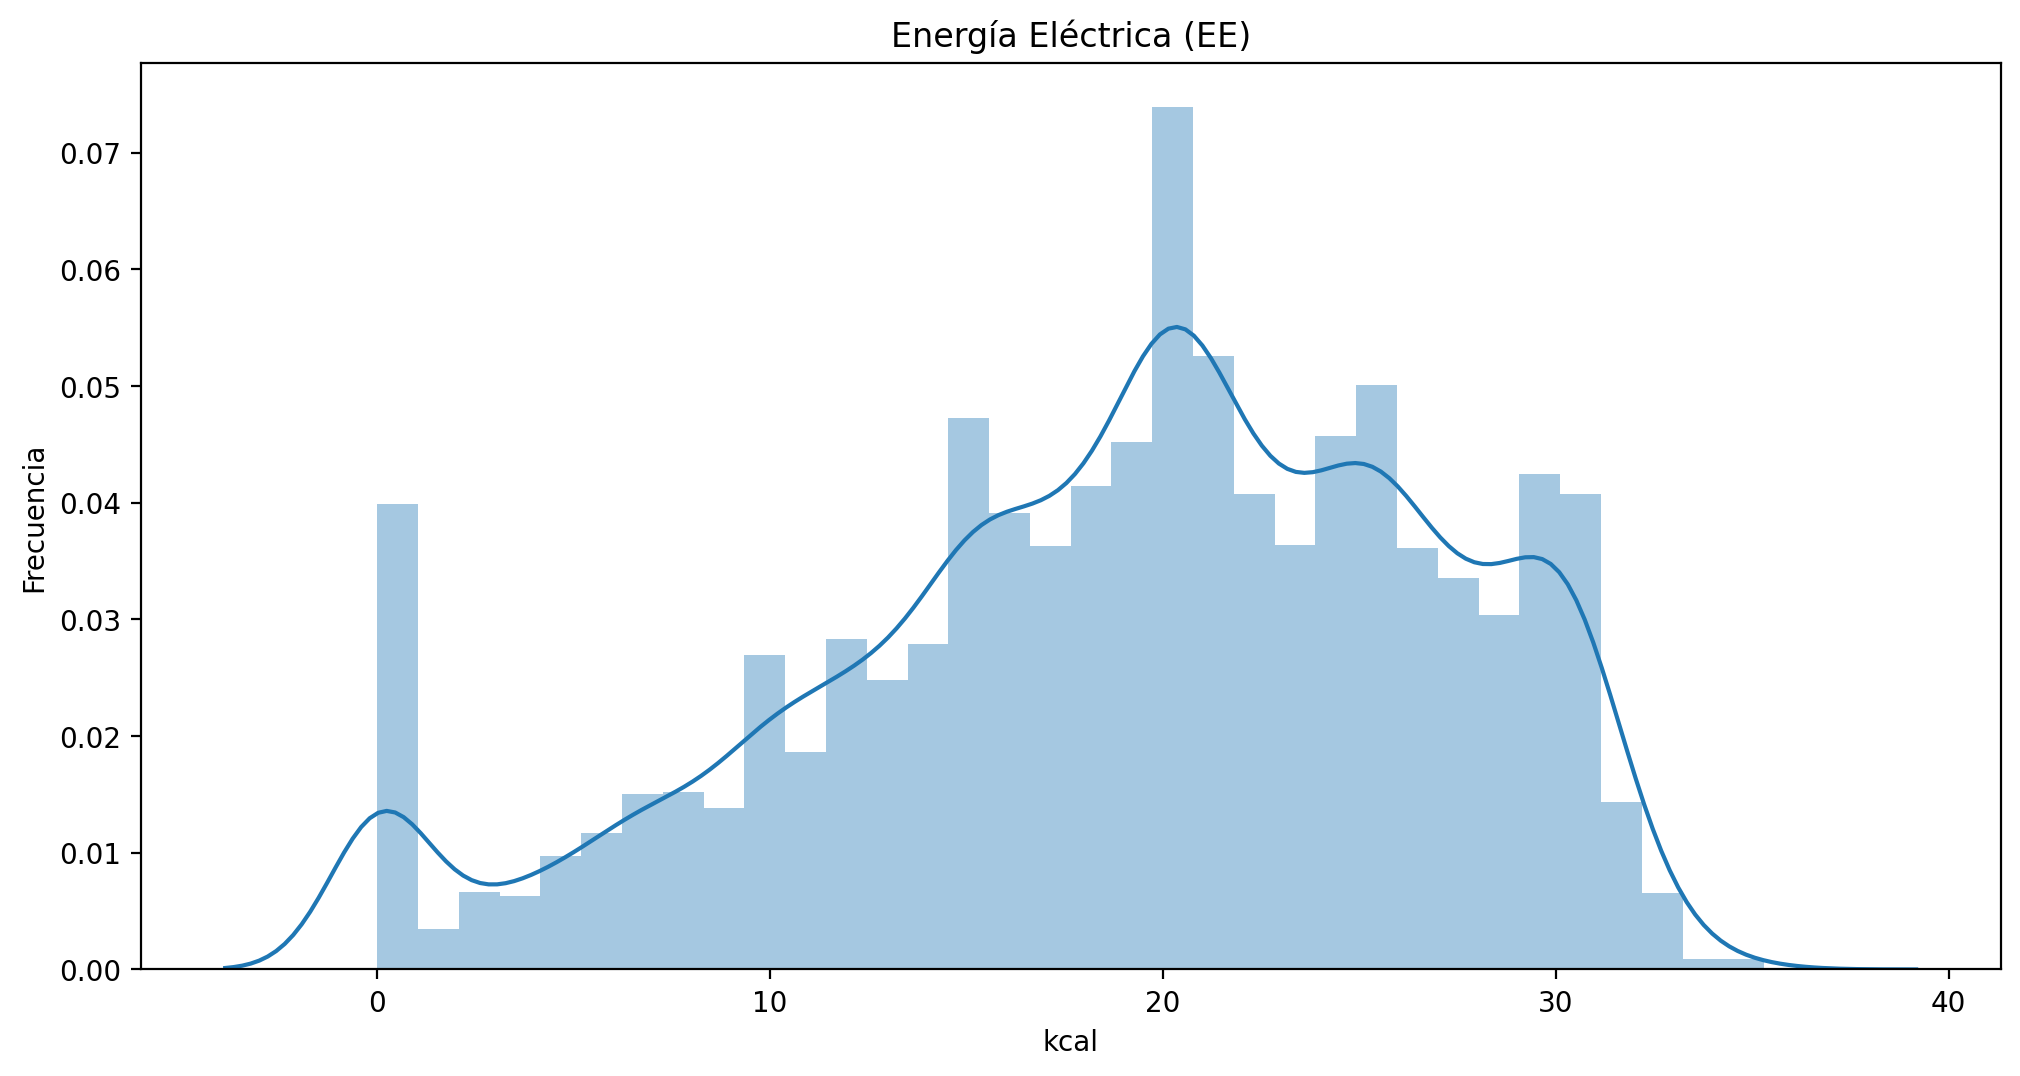

In [14]:
#Energía EE
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['EE']
res = sn.distplot(data)
plt.title("Energía Eléctrica (EE)")
plt.xlabel("kcal")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='EE'>

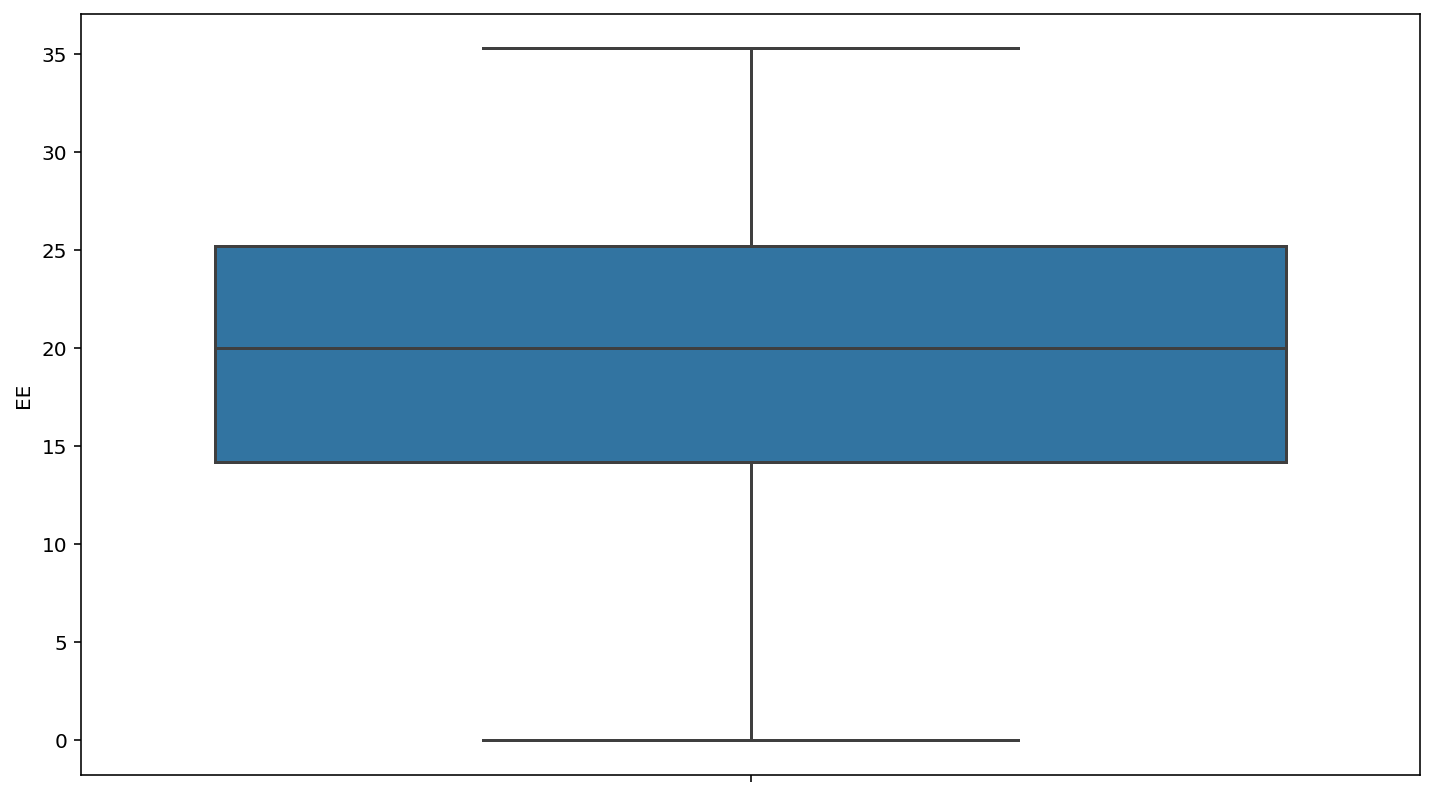

In [15]:
sns.boxplot(y = df['EE'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


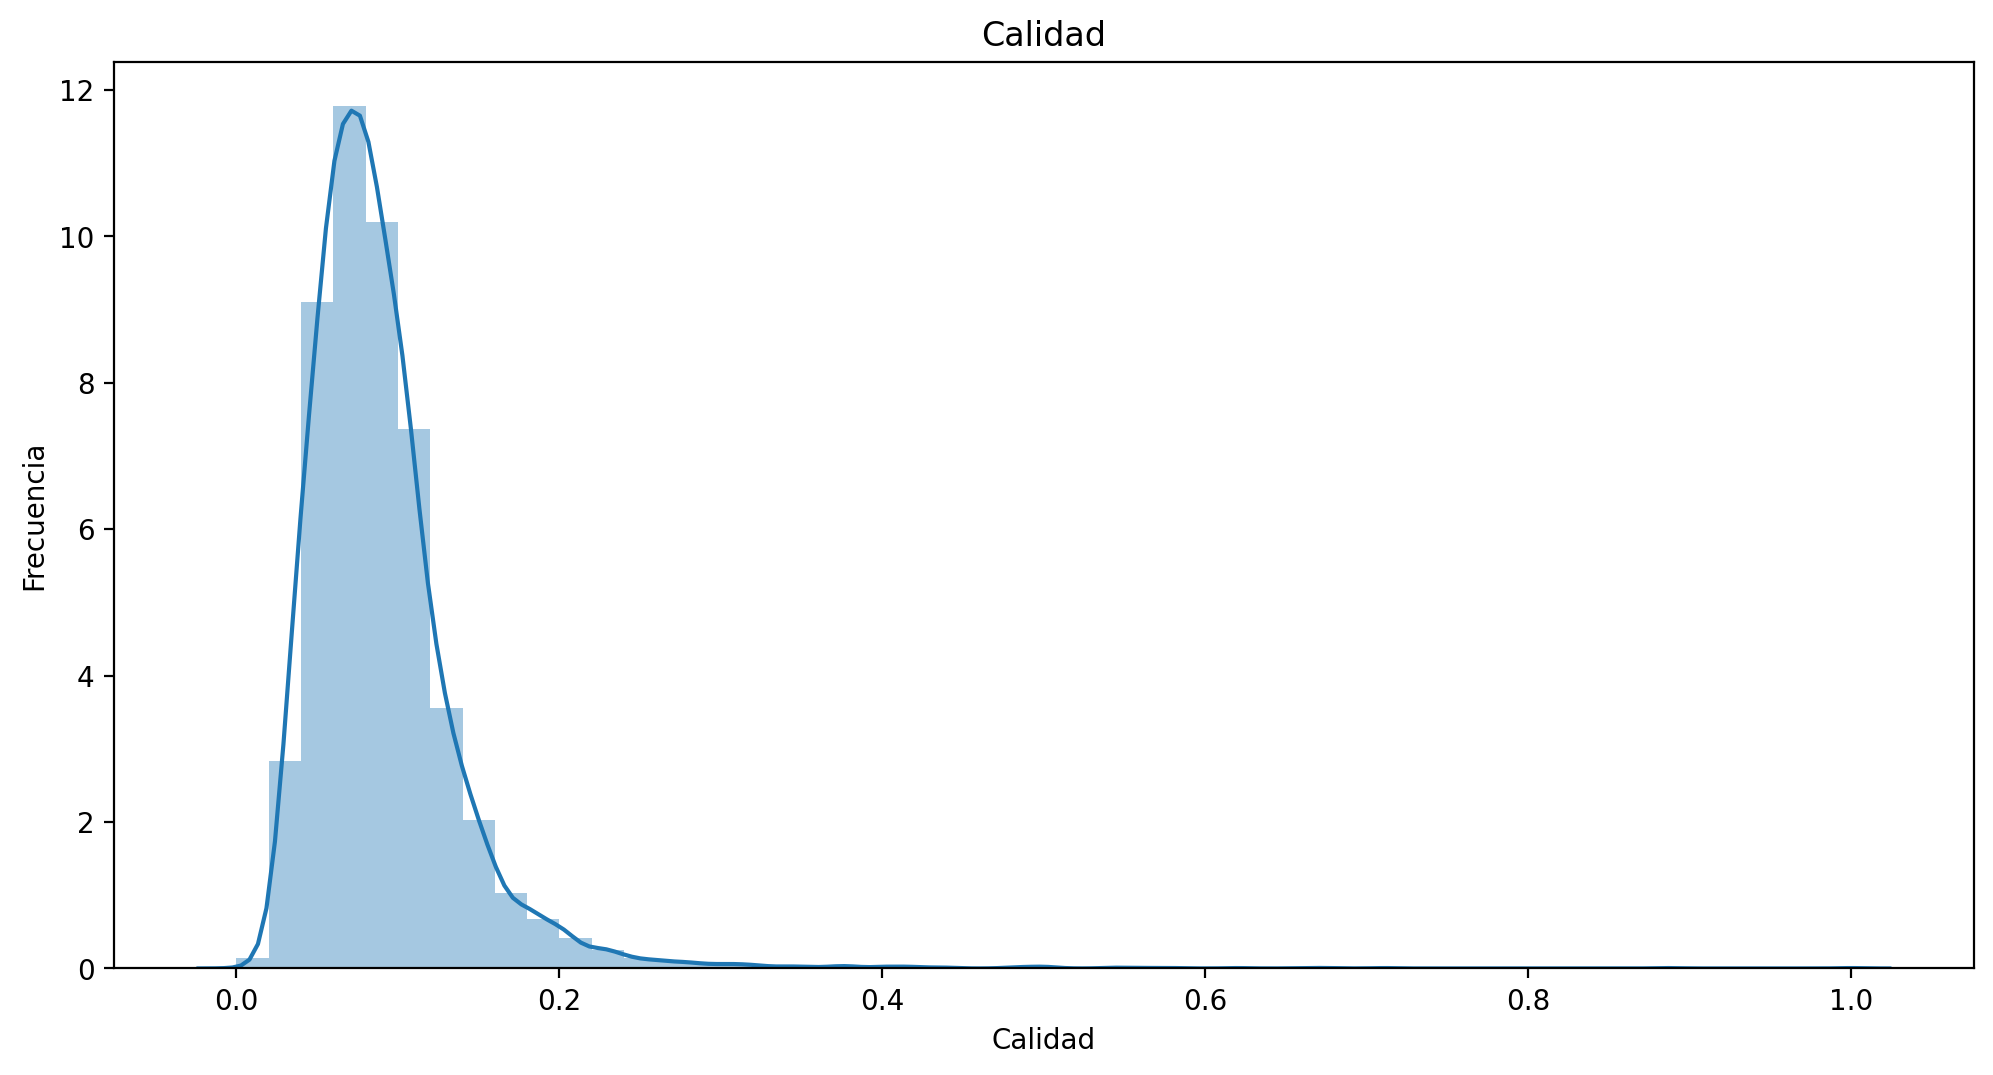

In [16]:
#Calidad
fig = plt.figure(figsize=(12, 6), dpi = 100, edgecolor = 'w', frameon = True)
data = df['Calidad']
res = sn.distplot(data)
plt.title("Calidad")
plt.xlabel("Calidad")
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:ylabel='Calidad'>

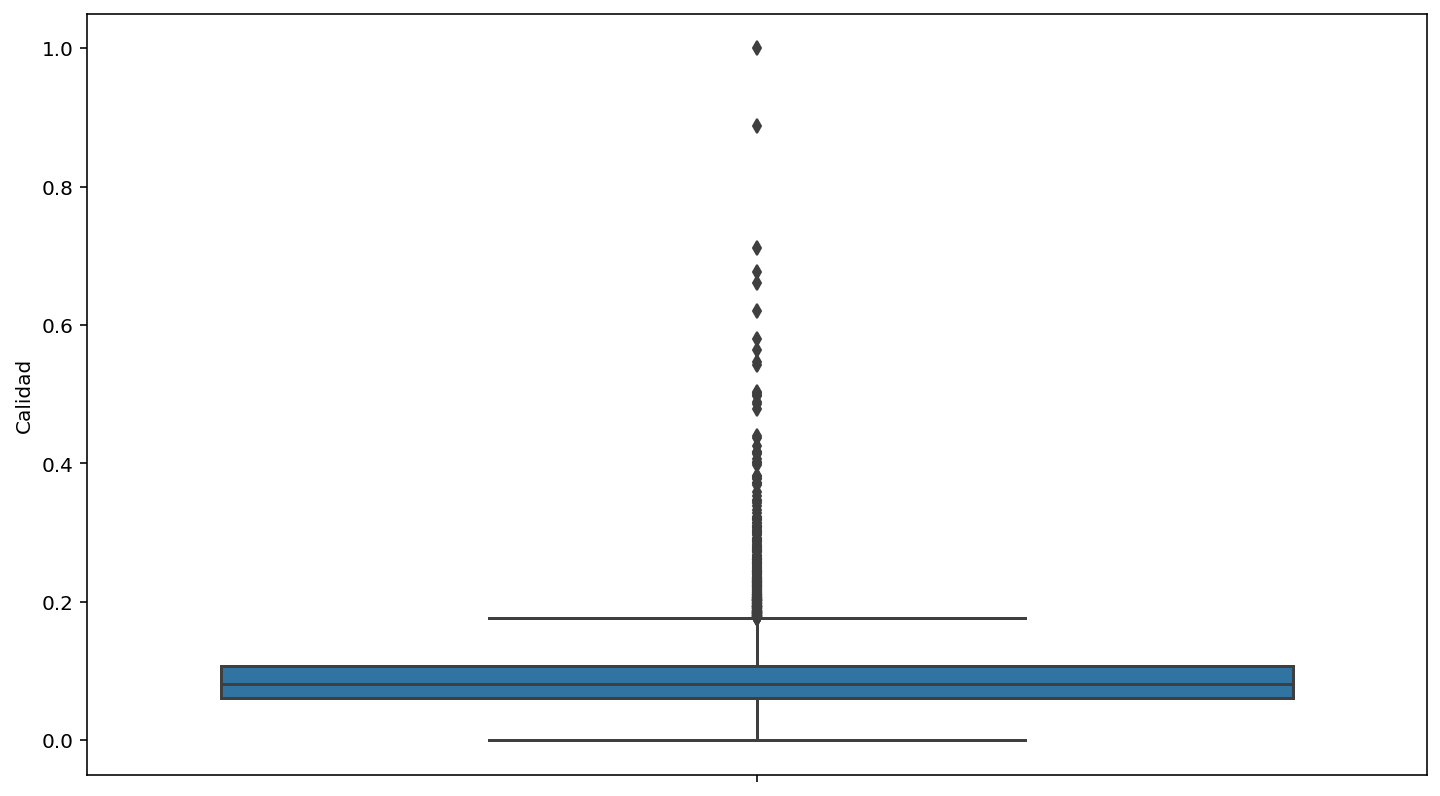

In [17]:
sns.boxplot(y = df['Calidad'])

Dado que el número de registros con valores nulos es mucho menor al total de registros, se puede simplemente prescindir de ellos.

In [18]:
dff = df.dropna(how = 'any')

Se verifica que no haya datos duplicados en la fecha. Solo debe haber una medición por día.

In [19]:
dff['TIME'] = pd.to_datetime(dff['TIME'])
dff.drop_duplicates(subset = 'TIME')

<ipython-input-19-780652354b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['TIME'] = pd.to_datetime(dff['TIME'])


TIME  Dureza  Tasa_Prod   Asp    EC    EE  Calidad
0    1995-01-01   100.0        368  2.78  15.1  29.7    0.053
1    1995-02-01   100.0        426  3.00  26.9   0.0    0.108
2    1995-03-01   101.0        446  3.00  29.5   0.0    0.098
3    1995-04-01    99.0        395  3.00  18.9  25.4    0.056
4    1995-05-01   102.0        380  3.00  17.5  26.6    0.051
...         ...     ...        ...   ...   ...   ...      ...
9387 2020-09-13   104.0        413  3.52  16.9  24.8    0.108
9388 2020-09-14   101.0        408  3.52  21.7  13.9    0.061
9389 2020-09-15   100.0        352  3.52  15.6  17.6    0.031
9390 2020-09-16   100.0        399  3.52  17.0  22.8    0.059
9391 2020-09-17   101.0        413  2.03  18.8  18.7    0.058

[9390 rows x 7 columns]

In [20]:
dff.describe()

Dureza    Tasa_Prod          Asp           EC           EE  \
count  9390.000000  9390.000000  9390.000000  9390.000000  9390.000000   
mean    104.028754   391.003940     3.152330    19.361544    19.059350   
std       2.049142    43.357246     0.375264     6.698935     8.035938   
min      80.000000     0.000000     0.090000     0.000000     0.000000   
25%     103.000000   383.000000     3.040000    15.900000    14.200000   
50%     104.000000   398.000000     3.260000    19.200000    20.000000   
75%     105.000000   408.000000     3.380000    23.500000    25.200000   
max     112.000000   480.000000     3.520000    40.400000    35.300000   

           Calidad  
count  9390.000000  
mean      0.089890  
std       0.048824  
min       0.000000  
25%       0.061000  
50%       0.081000  
75%       0.107000  
max       1.000000

Se agrega la columna "suma" con el total de energía calórica y energía eléctrica.

<ipython-input-21-5756b9c02a94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['suma'] = suma


<AxesSubplot:ylabel='suma'>

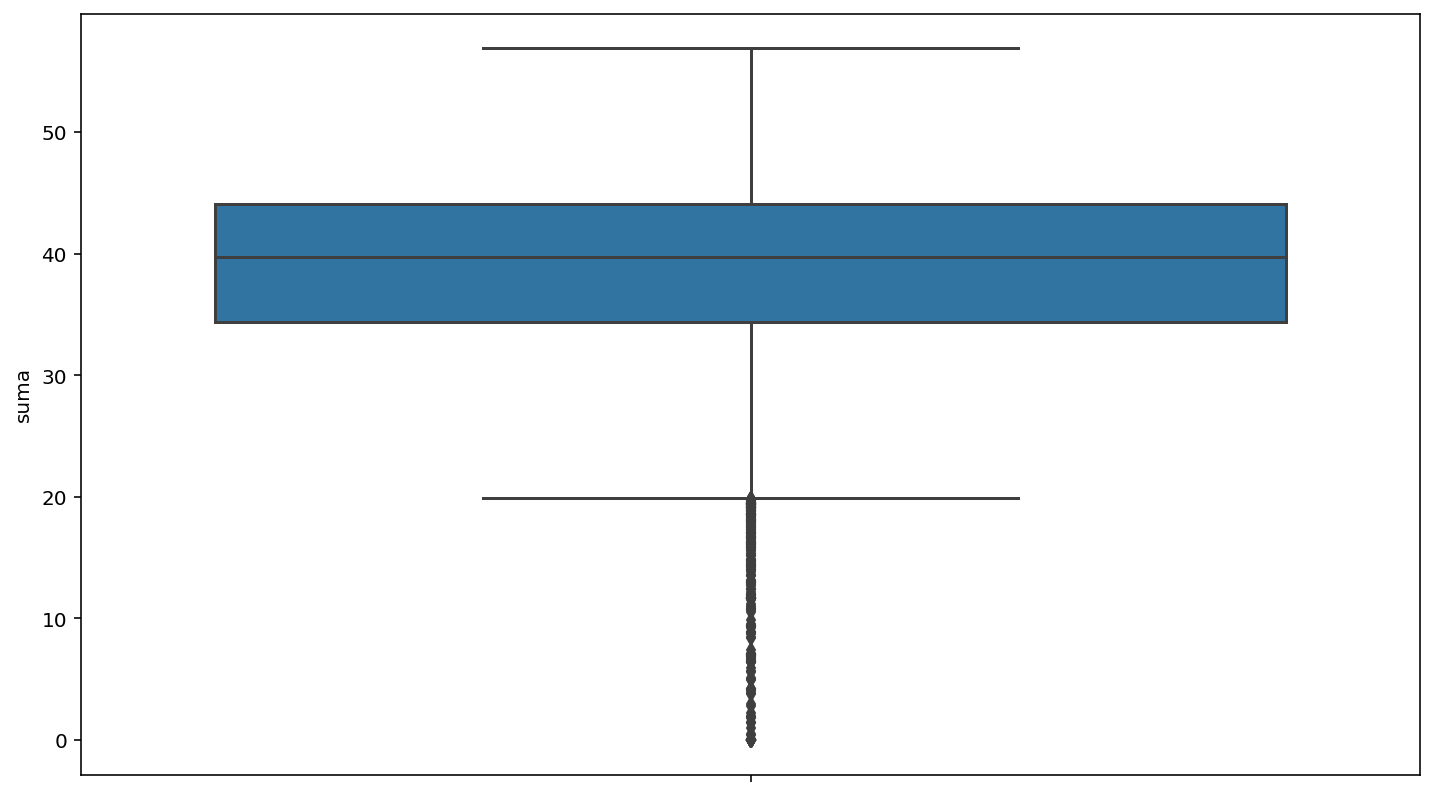

In [21]:
suma = dff['EC'] + dff['EE']
dff['suma'] = suma
sns.boxplot(y = dff['suma'])

Se eliminan registros con valores atípicos para no tener bins con pocos datos.

In [22]:
dff = dff[dff['suma'] > 10]
dff = dff[dff['Calidad'] < 0.3]
dff = dff[dff['Calidad'] > 0]
dff = dff[dff['Tasa_Prod'] > 250]
dff = dff[dff['Dureza'] > 97]
dff = dff[dff['Dureza'] < 112]
dff = dff[dff['Asp'] >= 1]
del dff['Asp']
dff = dff.reset_index(drop=True)
dff.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  9135.000000  9135.000000  9135.000000  9135.000000  9135.000000   
mean    104.065353   394.742310    19.592797    19.242671     0.087847   
std       1.960023    25.506684     6.422664     7.885315     0.039342   
min      98.000000   252.000000     0.000000     0.000000     0.012000   
25%     103.000000   384.000000    16.100000    14.600000     0.061000   
50%     104.000000   398.000000    19.300000    20.100000     0.081000   
75%     105.000000   409.000000    23.600000    25.300000     0.106000   
max     111.000000   480.000000    40.400000    35.300000     0.298000   

              suma  
count  9135.000000  
mean     38.835468  
std       7.369699  
min      10.500000  
25%      34.700000  
50%      39.900000  
75%      44.200000  
max      56.900000

Se verifica las correlaciones entre las variables originales.

['Dureza', 'Tasa_Prod', 'Asp', 'EC', 'EE', 'Calidad']


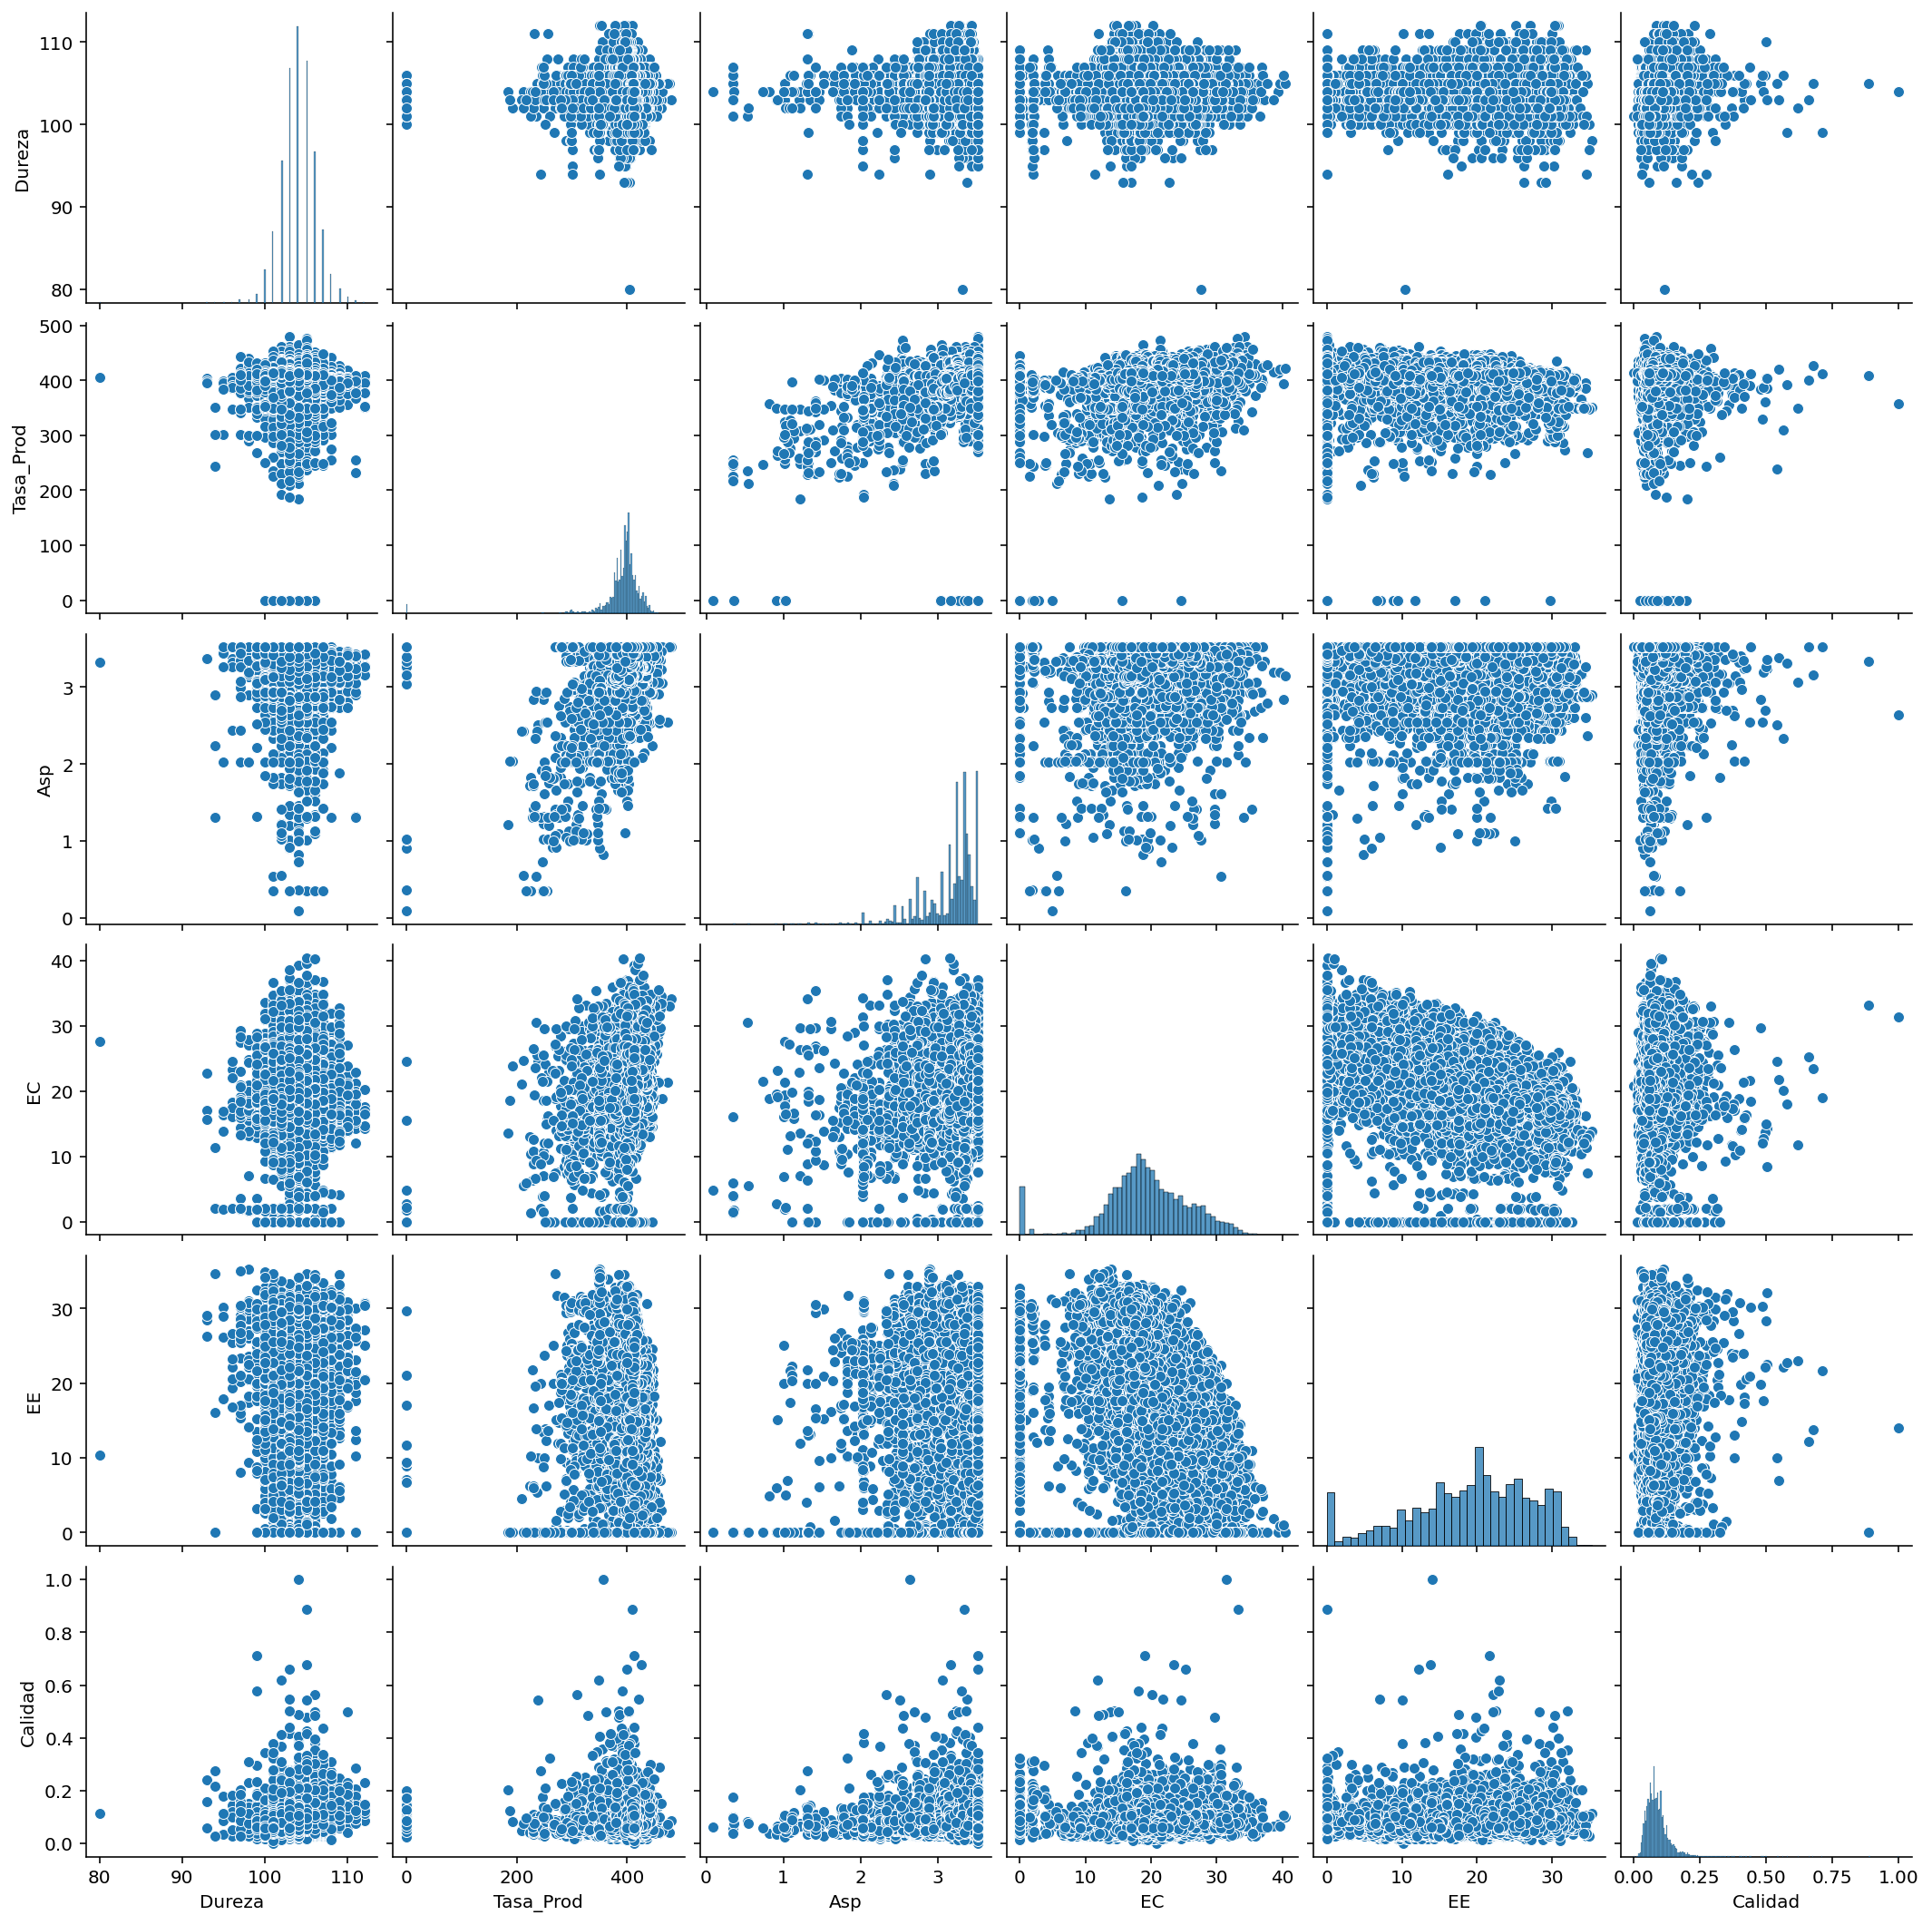

In [23]:
pair_cols = list(df.columns[1:6])
pair_cols.extend(df.columns[-1:])
print(pair_cols)
sns.pairplot(df.loc[:,pair_cols])
plt.show()

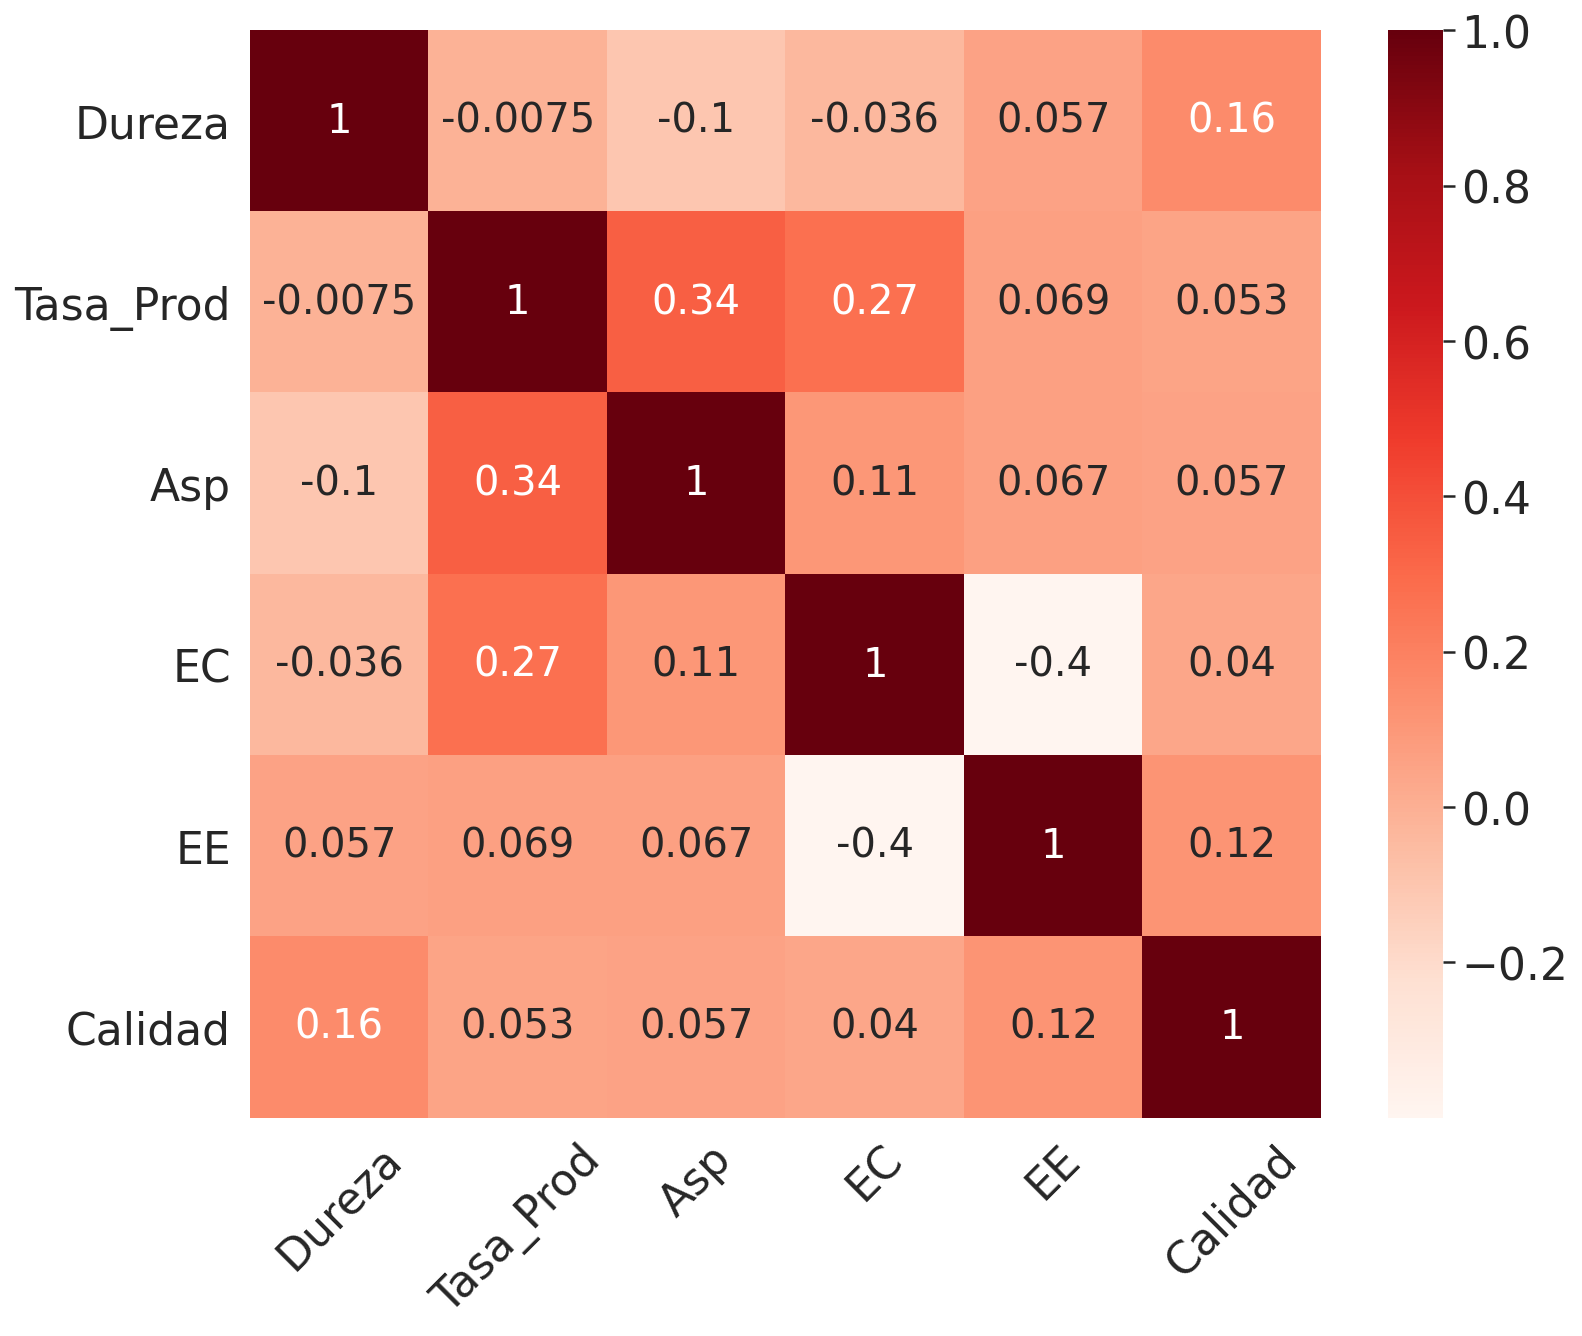

In [39]:
plt.figure(figsize=(12,10))
cor = df.loc[:,pair_cols].corr()
hm = sns.heatmap(cor, annot=True, annot_kws={"fontsize":20}, cmap=plt.cm.Reds)
plt.show()

In [142]:
#Correlation with output variable
cor_target = abs(cor)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Dureza  Tasa_Prod       Asp        EC        EE  Calidad
Dureza        1.0        NaN       NaN       NaN       NaN      NaN
Tasa_Prod     NaN   1.000000  0.342627       NaN       NaN      NaN
Asp           NaN   0.342627  1.000000       NaN       NaN      NaN
EC            NaN        NaN       NaN  1.000000  0.399944      NaN
EE            NaN        NaN       NaN  0.399944  1.000000      NaN
Calidad       NaN        NaN       NaN       NaN       NaN      1.0

Las mayores correlaciones son las de EC y EE (negativa), Asp y Tasa de Producción y EE y Tasa de Producción.

Se agregan columnas de costo ponderado y costo ponderado unitario.

In [143]:
dff=dff.assign(costo_ponderado=lambda row: (row['EE']+ 0.724*row['EC']))
dff=dff.assign(costo_pon_un=lambda row: (row['costo_ponderado']/row['Tasa_Prod']))
dff.describe()

Dureza    Tasa_Prod           EC           EE      Calidad  \
count  9135.000000  9135.000000  9135.000000  9135.000000  9135.000000   
mean    104.065353   394.742310    19.592797    19.242671     0.087847   
std       1.960023    25.506684     6.422664     7.885315     0.039342   
min      98.000000   252.000000     0.000000     0.000000     0.012000   
25%     103.000000   384.000000    16.100000    14.600000     0.061000   
50%     104.000000   398.000000    19.300000    20.100000     0.081000   
75%     105.000000   409.000000    23.600000    25.300000     0.106000   
max     111.000000   480.000000    40.400000    35.300000     0.298000   

              suma  costo_ponderado  costo_pon_un  
count  9135.000000      9135.000000   9135.000000  
mean     38.835468        33.427856      0.084966  
std       7.369699         6.945541      0.018239  
min      10.500000         7.602000      0.020477  
25%      34.700000        29.557200      0.073565  
50%      39.900000        34.142400      0.086261  
75%      44.200000        38.535400      0.098708  
max      56.900000        50.138000      0.149182

Se prepara un dataframe con los datos estandarizados para probar el modelo más adelante.

In [144]:
df_est = dff.copy()
del df_est['suma']
df_est[['Dureza', 'Tasa_Prod','EC','EE','Calidad','costo_ponderado','costo_pon_un']] = StandardScaler().fit_transform(df_est[['Dureza','Tasa_Prod','EC','EE','Calidad','costo_ponderado','costo_pon_un']])
df_est.describe()

Se grafica la calidad, la dureza y la tasa de producción (futuras variables de entrada) contra el costo ponderado unitario (una de las futuras variables de salida).

In [145]:
px.scatter(dff, x='Calidad', y='costo_pon_un',marginal_y='histogram', color ='costo_pon_un')

In [146]:
px.scatter(dff, x='Dureza', y='costo_pon_un',marginal_y='histogram', color ='costo_pon_un')

In [147]:
px.scatter(dff, x='Tasa_Prod', y='costo_pon_un',marginal_y='histogram', color ='costo_pon_un')

In [148]:
fig = px.scatter_3d(dff, x='Calidad', y='Dureza', z='Tasa_Prod',color='costo_pon_un')
fig.show()

Tamaño del dataframe después del filtrado.

In [149]:
dff.shape

(9135, 9)

Se crean bins de calidad, dureza y tasa de producción.

In [150]:
dff['Calidad_cut'] = pd.cut(dff['Calidad'],6, labels = False)
dff['Dureza_cut'] = pd.cut(dff['Dureza'],13, labels = False)
dff['TP_cut'] = pd.cut(dff['Tasa_Prod'],8, labels = False)

Se crea variable "cartesian" que es una tupla con el bin de calidad, dureza y tasa de producción.

In [151]:
df2 = dff.assign(cartesian=pd.Categorical(dff.filter(regex='_cut').apply(tuple, 1)))
df2.head()

TIME  Dureza  Tasa_Prod    EC    EE  Calidad  suma  costo_ponderado  \
0 1995-01-01   100.0        368  15.1  29.7    0.053  44.8          40.6324   
1 1995-02-01   100.0        426  26.9   0.0    0.108  26.9          19.4756   
2 1995-03-01   101.0        446  29.5   0.0    0.098  29.5          21.3580   
3 1995-04-01    99.0        395  18.9  25.4    0.056  44.3          39.0836   
4 1995-05-01   102.0        380  17.5  26.6    0.051  44.1          39.2700   

   costo_pon_un  Calidad_cut  Dureza_cut  TP_cut  cartesian  
0      0.110414            0           1       4  (0, 1, 4)  
1      0.045717            2           1       6  (2, 1, 6)  
2      0.047888            1           2       6  (1, 2, 6)  
3      0.098946            0           0       5  (0, 0, 5)  
4      0.103342            0           3       4  (0, 3, 4)

Se localizan los registros con menor costo ponderado unitario para cada bin de tres dimensiones (cartesian).

In [152]:
df2.groupby(['cartesian'])['costo_pon_un'].idxmin().sort_index()
idx = df2.groupby(['cartesian'])['costo_pon_un'].idxmin().sort_index().values
idx

array([4348, 9022, 2214, 2081, 4360, 1944, 2240, 2885,  611, 2181,  450,
        624, 2948, 2297, 1188,  447, 4369, 5193,  952,  626, 2793, 4578,
       2849,  446, 4315,  625, 3078,  622,  623, 2851, 3987, 4452, 4473,
       5560, 3079, 4475, 4012, 4478, 3986, 3143, 4451, 3060, 4388,  621,
       7733, 2853, 4479, 4261, 7455, 4773, 4213, 2839, 4871, 4481, 3007,
       6516,  954,   83, 4477, 1231, 4599, 6193, 4924, 6935, 7329, 8957,
       8843,  612, 5375, 8054, 8866, 2256, 7853, 2305, 1941,  683,   44,
       8652, 4846, 3526, 8752, 8198,  951, 8528, 5191, 3833, 5439, 3120,
       3027, 8769, 5144, 2947, 7317, 7732, 3121,  512, 3018, 5699, 4803,
         98, 6308, 3100, 3122, 3123, 5071, 4771, 3568, 4734, 3080, 3626,
       2847, 3988, 3022, 4386, 4791, 1782, 3913, 3195, 4880, 1150, 4320,
       4326, 6059, 6299, 2727,  215, 1440, 7452, 6452, 7536, 7538,  652,
       6950, 7537, 7139, 3798, 7530, 7150, 7181, 6925, 7051, 7053, 8883,
       7072, 4347, 7052, 4799, 8525,    1, 4412, 22

Cantidad de mínimos.

In [153]:
idx.shape

(310,)

Se crea un dataframe con los mínimos solamente y se eliminan columnas inútiles o redundantes.

In [154]:
df_final = df2.take(idx)
df_final = df_final.drop(columns = ['TIME', 'Dureza', 'Tasa_Prod', 'Calidad','Calidad_cut','Dureza_cut','TP_cut'])

Se renombran las columnas.

In [155]:
df_final = df_final.rename(columns={'EC':'EC_op','EE':'EE_op','costo_pon_un':'costo_op','costo_ponderado':'costo_pon_op'})
df_final.head()

EC_op  EE_op  suma  costo_pon_op  costo_op  cartesian
4348   13.2   18.2  31.4       27.7568  0.093144  (0, 0, 1)
9022   24.1    0.0  24.1       17.4484  0.045676  (0, 0, 4)
2214    0.0   12.4  12.4       12.4000  0.030097  (0, 0, 5)
2081   18.8   14.1  32.9       27.7112  0.062980  (0, 0, 6)
4360    6.6   24.1  30.7       28.8784  0.097234  (0, 1, 1)

Se eliminan las columnas redundantes de df2 y se agregan las columnas de los óptimos por bin 3D.

In [156]:
df2 = df2.drop(columns = ['Calidad_cut','Dureza_cut','TP_cut'])
df2 = df_final.set_index('cartesian').combine_first(df2.drop_duplicates().set_index('cartesian')).reset_index()
df2.head()

cartesian  Calidad  Dureza    EC  EC_op    EE  EE_op       TIME  Tasa_Prod  \
0  (0, 0, 1)    0.045    98.0  24.8   13.2   9.4   18.2 2000-07-08        290   
1  (0, 0, 1)    0.032    98.0  13.2   13.2  18.2   18.2 2007-12-04        298   
2  (0, 0, 1)    0.031    98.0   7.1   13.2  23.6   18.2 2007-04-24        299   
3  (0, 0, 4)    0.043    99.0  20.0   24.1  21.6    0.0 1995-02-04        379   
4  (0, 0, 4)    0.038    99.0  24.5   24.1  17.9    0.0 2000-06-28        372   

   costo_op  costo_pon_op  costo_pon_un  costo_ponderado  suma  
0  0.093144       27.7568      0.094328          27.3552  31.4  
1  0.093144       27.7568      0.093144          27.7568  31.4  
2  0.093144       27.7568      0.096122          28.7404  31.4  
3  0.045676       17.4484      0.095198          36.0800  24.1  
4  0.045676       17.4484      0.095801          35.6380  24.1

Se divide el dataframe en variables de entrada y variables de salida.

In [157]:
X=df2[['Calidad','Dureza','Tasa_Prod']].values
y =df2[['EE_op','EC_op','costo_op']].values

Se dividen las variables de entrada y salida en conjuntos de entrenamiento y prueba.

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

Se crean modelos de regresión lineal, árbol de decisión, random forest y XGBRegressor. Se entrenan y se prueban para calcular métricas de cada modelo como $R^2$, error logarítmico cuadrado medio (cuando es posible), error cuadrado medio y error absoluto medio.

In [159]:
#Linear Regression
model =LinearRegression()
regressor=MultiOutputRegressor(model)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
lrr2=r2_score(y_test,y_pred)
lrms = mean_squared_log_error(y_test, y_pred)
lrme = mean_squared_error(y_test, y_pred)
lrma = mean_absolute_error(y_test, y_pred)
print('R2:',lrr2)
print('MSLE:',lrms)
print('MSE:',lrme)
print('MAE:',lrma)

R2: 0.14956522546338868
MSLE: 1.1285773258470797
MSE: 37.456786438562915
MAE: 4.1956524897985465


In [160]:
#Decision Tree Regressor
model =DecisionTreeRegressor()
regressor=MultiOutputRegressor(model)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
dtr2=r2_score(y_test,y_pred)
dtms = mean_squared_log_error(y_test, y_pred)
dtme = mean_squared_error(y_test, y_pred)
dtma = mean_absolute_error(y_test, y_pred)
print('R2:',dtr2)
print('MSLE:',dtms)
print('MSE:',dtme)
print('MAE:',dtma)

R2: 0.901010986950487
MSLE: 0.030926026322301778
MSE: 2.537158333193102
MAE: 0.1701446617535541


In [161]:
#Random Forest Regressor
model =RandomForestRegressor()
regressorPro=MultiOutputRegressor(model)
regressorPro.fit(X_train, y_train)
y_pred=regressorPro.predict(X_test)
rfr2=r2_score(y_test,y_pred)
rfms = mean_squared_log_error(y_test, y_pred)
rfme = mean_squared_error(y_test, y_pred)
rfma = mean_absolute_error(y_test, y_pred)
print('R2:',rfr2)
print('MSLE:',rfms)
print('MSE:',rfme)
print('MAE:',rfma)

R2: 0.9277598886355708
MSLE: 0.034146907675100556
MSE: 1.7965260139075097
MAE: 0.24840805933319318


In [162]:
model=XGBRegressor(objective ='reg:squarederror', learning_rate =0.901, n_estimators=8, subsample = 0.99, max_depth = 18)
regressor = MultiOutputRegressor(model)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
xgbr2 = r2_score(y_test,y_pred)
#xgbms = mean_squared_log_error(y_test, y_pred)
xgbme = mean_squared_error(y_test, y_pred)
xgbma = mean_absolute_error(y_test, y_pred)
print('R2:',xgbr2)
#print('MSLE:',xgbms)
print('MSE:',xgbme)
print('MAE:',xgbma)

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:442: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



R2: 0.9246437641970817
MSE: 2.464480834805857
MAE: 0.2321611727673336


Se crean gráficas con los valores reales y los valores de predicción.

In [163]:
dfyt=pd.DataFrame(y_test)
dfyt.columns = ['EE', 'EC','cost_pon_un']
dfyp=pd.DataFrame(y_pred)
dfyp.columns = ['EE', 'EC','cost_pon_un']

In [164]:
xr = dfyt['EE'].tolist()
yr = dfyt['EC'].tolist()
zr = dfyt['cost_pon_un'].tolist()
xe = dfyp['EE'].tolist()
ye = dfyp['EC'].tolist()
ze = dfyp['cost_pon_un'].tolist()

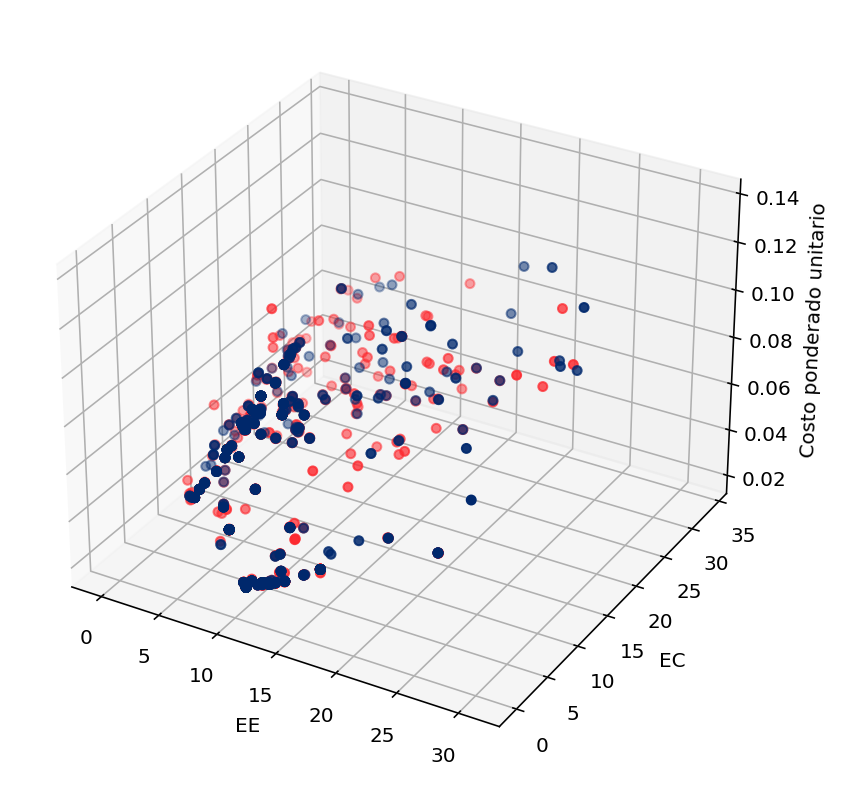

In [165]:
fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.scatter(xr, yr, zr, c ='#00286d', marker='o')
bx.scatter(xe, ye, ze, c = '#fd292f', marker = 'o')

bx.set_xlabel('EE')
bx.set_ylabel('EC')
bx.set_zlabel('Costo ponderado unitario')

plt.show()

In [166]:
rand_lay = go.Layout(
    title='Visualización de errores',
    scene=dict(
        xaxis=dict(
            title='EE'
        ),
        yaxis=dict(
            title='EC'
        ),
        zaxis=dict(
            title='Costo ponderado unitario'
        )
    )
)
fig = go.Figure(layout=rand_lay)

fig.add_trace(go.Scatter3d(x=xr, y=yr, z=zr, mode='markers',name='Real',marker=dict(color='#00286d')))
fig.add_trace(go.Scatter3d(x=xe, y=ye, z=ze, mode='markers',name='Predición',marker=dict(color='#fd292f')))

fig.show()

Se crea dataframe con las métricas de evaluación de los modelos.

In [167]:
Regressor= make_dataclass("Regressor", [("Regresor", str), ("Puntaje_r2", float), ('MSLE', float), ('MSE', float), ('MAE', float)])
puntajes = pd.DataFrame([Regressor('Regresión lineal múltiple', lrr2, lrms, lrme, lrma), Regressor('Árbol de decisión', dtr2, dtms, dtme, dtma), Regressor('Random forest', rfr2, rfms, rfme, rfma), Regressor('XGBRegressor', xgbr2, np.NaN, xgbme, xgbma)])
puntajes = puntajes.sort_values(by = 'Puntaje_r2', ascending= False)

In [168]:
puntajes.head()

Regresor  Puntaje_r2      MSLE        MSE       MAE
2              Random forest    0.927760  0.034147   1.796526  0.248408
3               XGBRegressor    0.924644       NaN   2.464481  0.232161
1          Árbol de decisión    0.901011  0.030926   2.537158  0.170145
0  Regresión lineal múltiple    0.149565  1.128577  37.456786  4.195652

Se grafican las métricas de evaluación por modelo.

<AxesSubplot:xlabel='Puntaje_r2', ylabel='Regresor'>

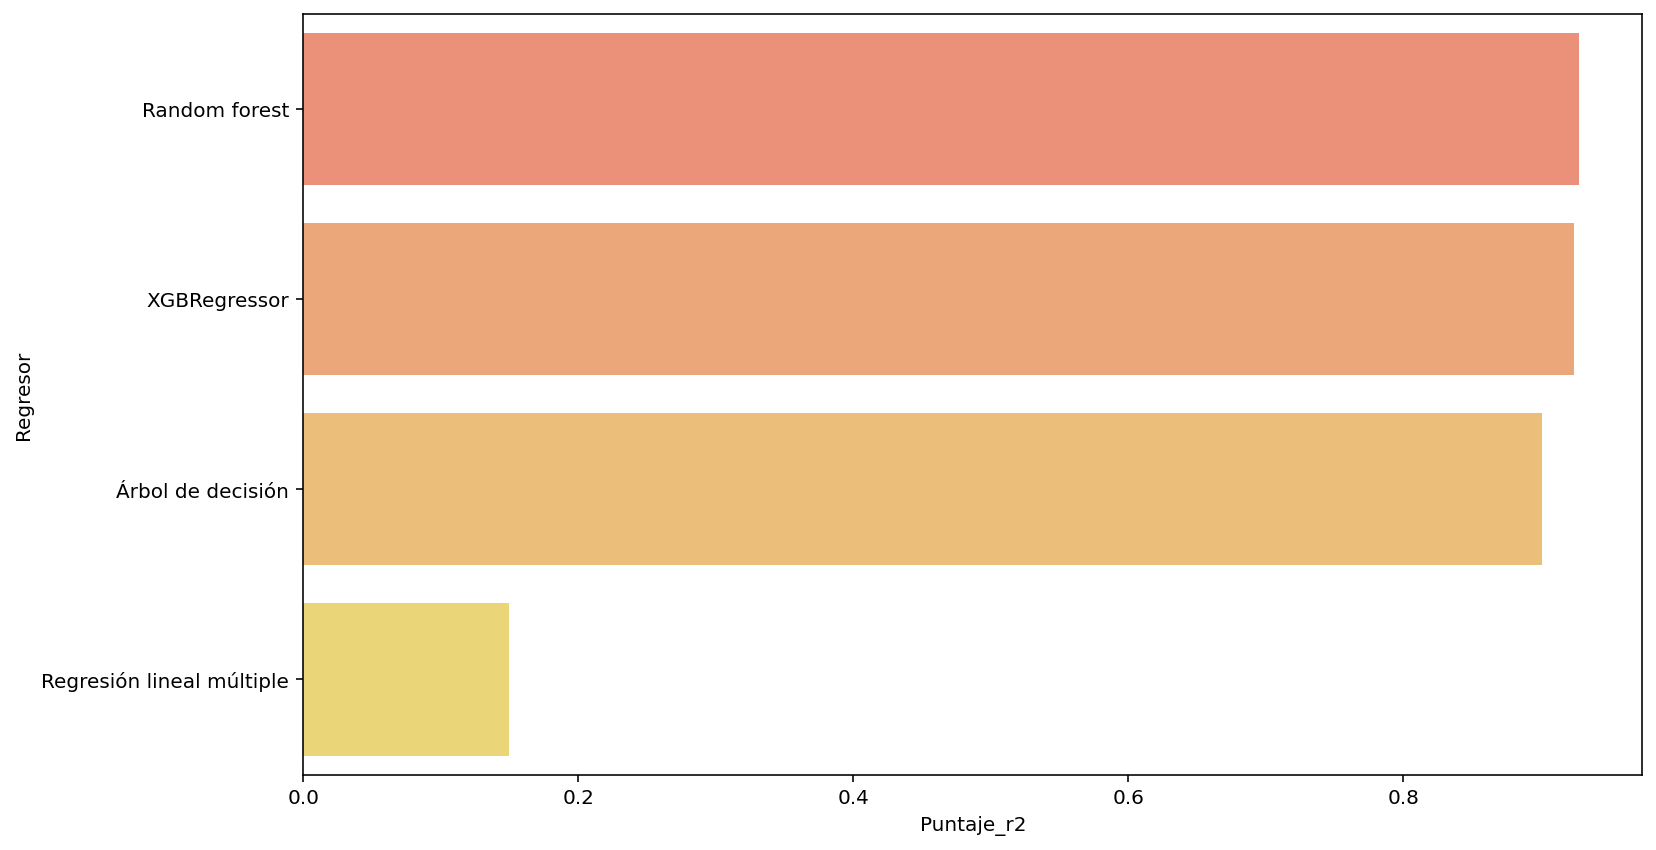

In [169]:
sns.barplot(data = puntajes, x='Puntaje_r2', y = 'Regresor', palette = 'autumn', alpha =0.6)

<AxesSubplot:xlabel='MSLE', ylabel='Regresor'>

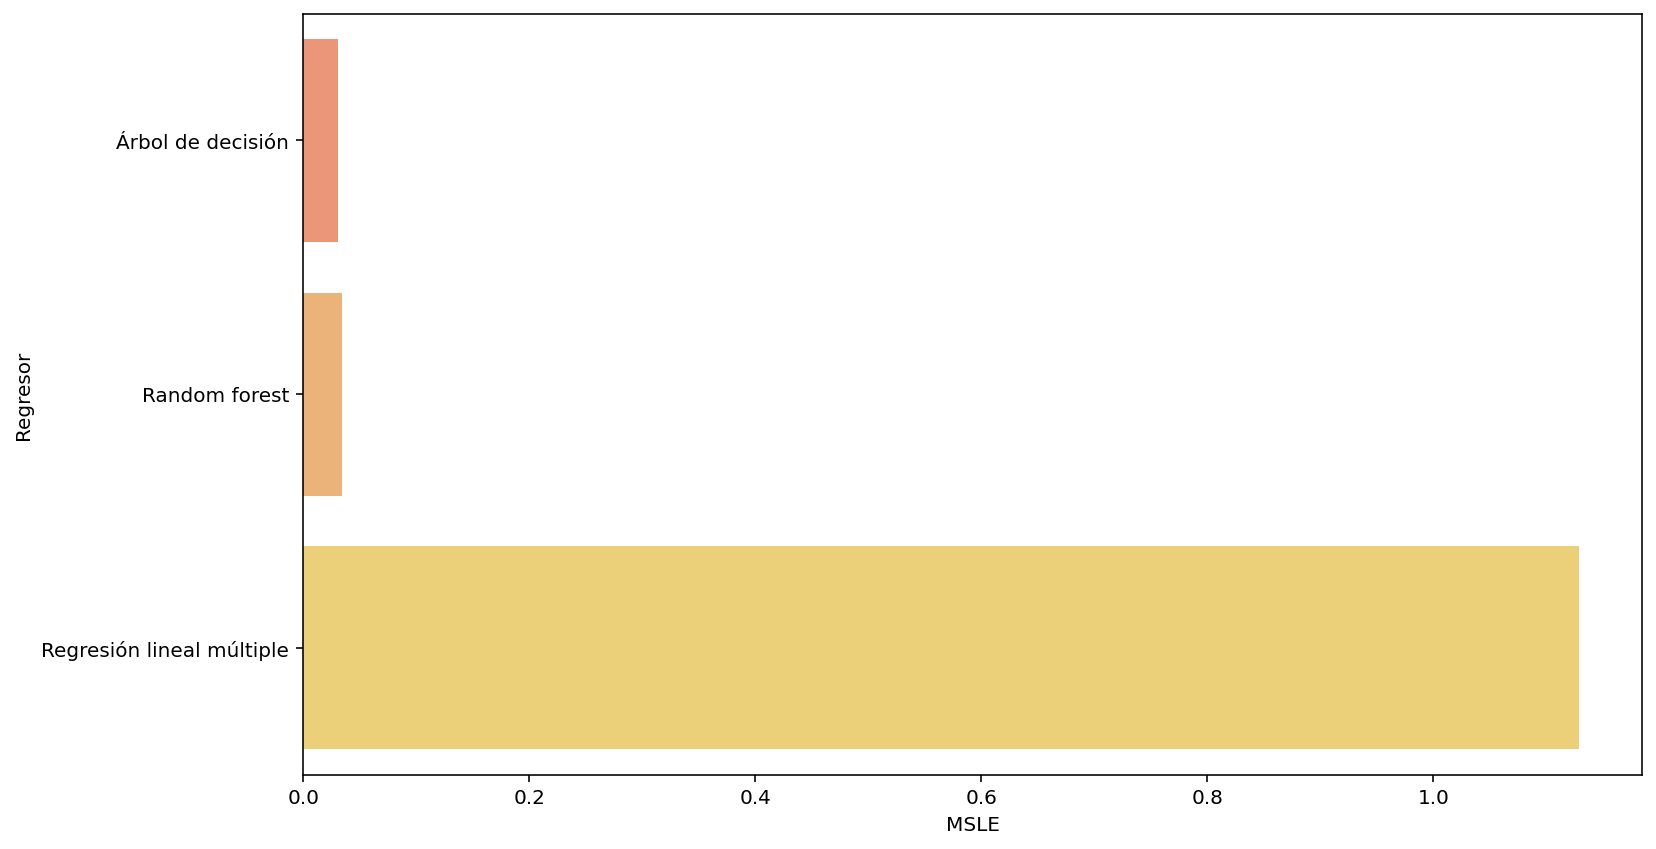

In [170]:
sin_xgb=puntajes.dropna()
sin_xgb = sin_xgb.sort_values(by = 'MSLE')
sns.barplot(data = sin_xgb, x='MSLE', y = 'Regresor', palette = 'autumn', alpha =0.6)

<AxesSubplot:xlabel='MSE', ylabel='Regresor'>

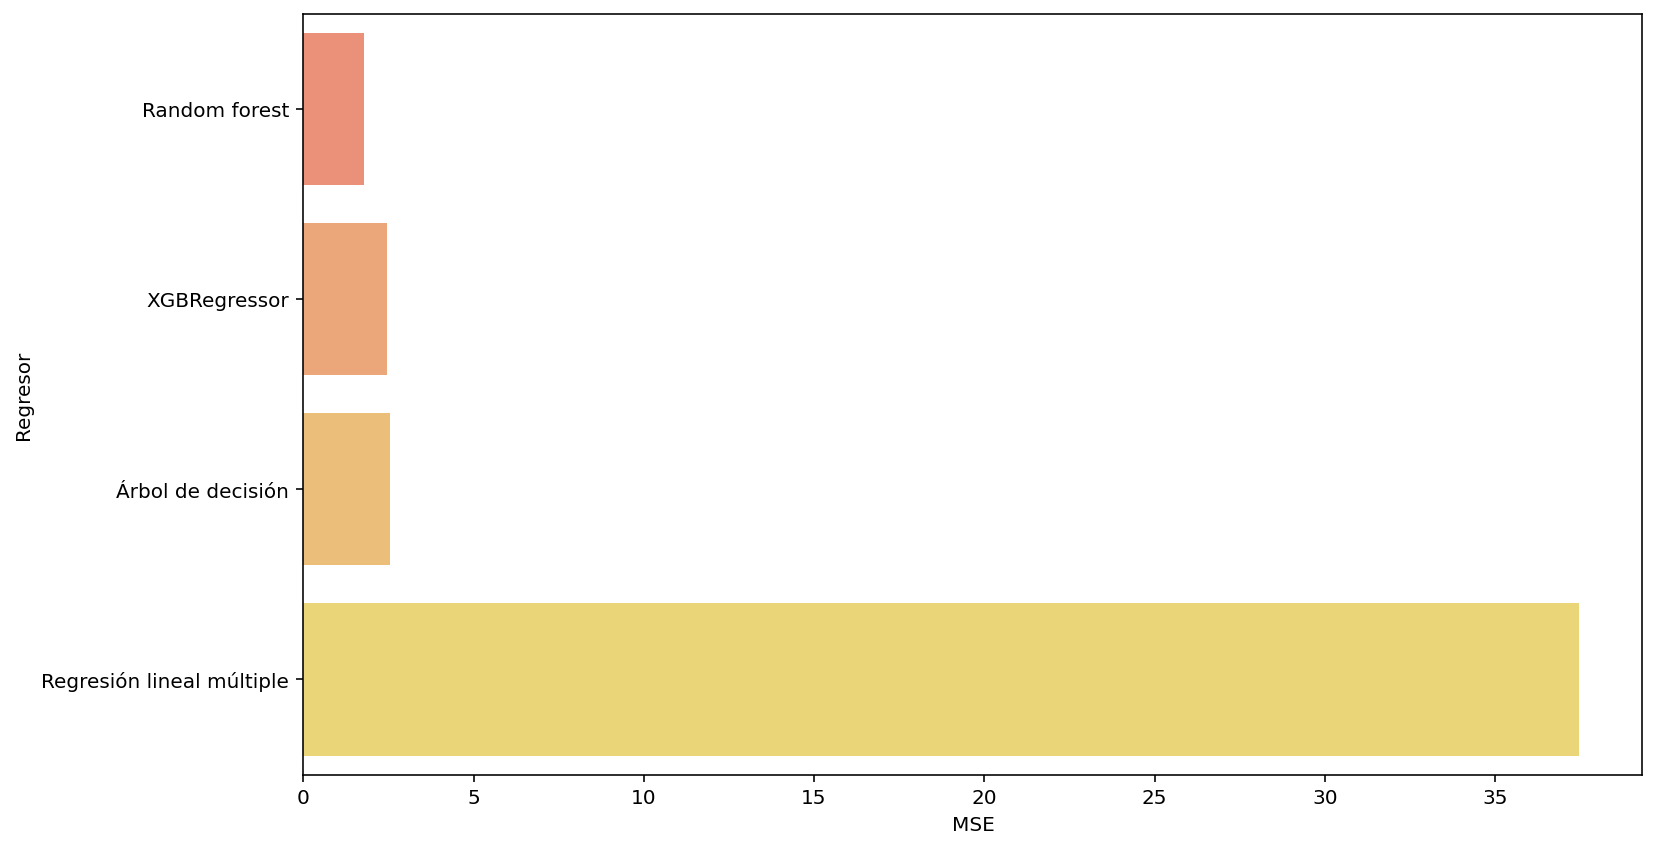

In [171]:
puntajes = puntajes.sort_values(by = 'MSE')
sns.barplot(data = puntajes, x='MSE', y = 'Regresor', palette = 'autumn', alpha =0.6)

<AxesSubplot:xlabel='MAE', ylabel='Regresor'>

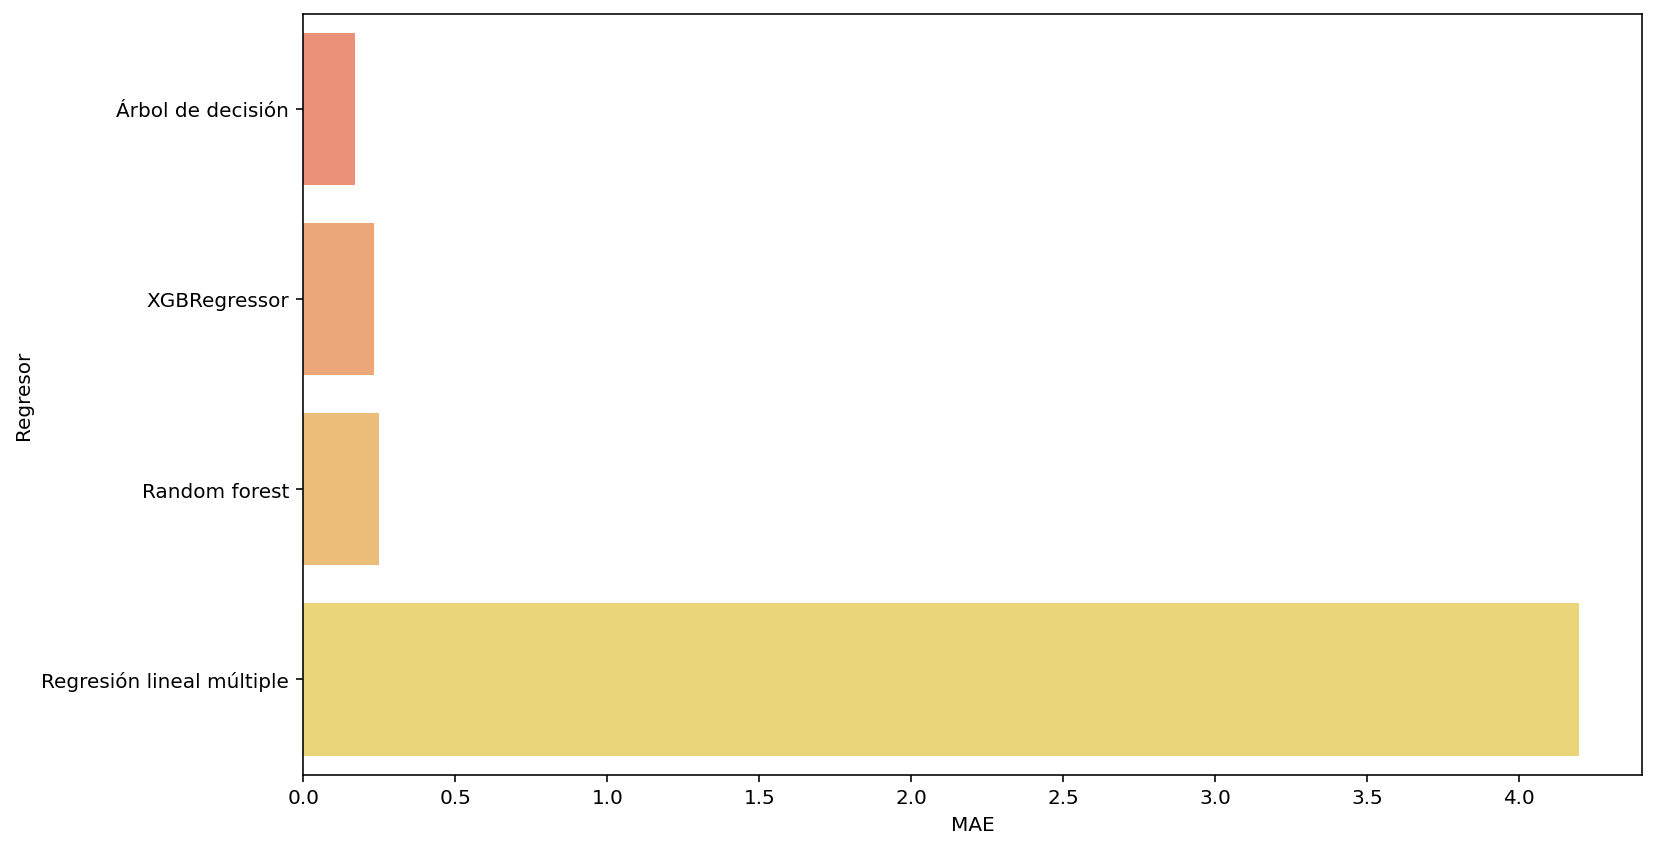

In [172]:
puntajes = puntajes.sort_values(by = 'MAE')
sns.barplot(data = puntajes, x='MAE', y = 'Regresor', palette = 'autumn', alpha =0.6)

Se repitió exactamente el mismo proceso con los datos estandarizados.

In [173]:
df_est['Calidad_cut'] = pd.cut(df_est['Calidad'],6, labels = False)
df_est['Dureza_cut'] = pd.cut(df_est['Dureza'],13, labels = False)
df_est['TP_cut'] = pd.cut(df_est['Tasa_Prod'],8, labels = False)

In [174]:
df2_est = df_est.assign(cartesian=pd.Categorical(df_est.filter(regex='_cut').apply(tuple, 1)))
df2_est.head()

TIME    Dureza  Tasa_Prod        EC        EE   Calidad  \
0 1995-01-01 -2.074249  -1.048501 -0.699561  1.326250 -0.885776   
1 1995-02-01 -2.074249   1.225538  1.137784 -2.440451  0.512284   
2 1995-03-01 -1.564023   2.009689  1.542622 -2.440451  0.258091   
3 1995-04-01 -2.584475   0.010103 -0.107873  0.780903 -0.809519   
4 1995-05-01 -1.053797  -0.578010 -0.325863  0.933093 -0.936615   

   costo_ponderado  costo_pon_un  Calidad_cut  Dureza_cut  TP_cut  cartesian  
0         1.037347      1.395336            0           1       4  (0, 1, 4)  
1        -2.008918     -2.152088            2           1       6  (2, 1, 6)  
2        -1.737880     -2.033074            1           2       6  (1, 2, 6)  
3         0.814343      0.766511            0           0       5  (0, 0, 5)  
4         0.841182      1.007566            0           3       4  (0, 3, 4)

In [175]:
df2_est.groupby(['cartesian'])['costo_pon_un'].idxmin().sort_index()
idx_est = df2_est.groupby(['cartesian'])['costo_pon_un'].idxmin().sort_index().values
idx_est

array([4348, 9022, 2214, 2081, 4360, 1944, 2240, 2885,  611, 2181,  450,
        624, 2948, 2297, 1188,  447, 4369, 5193,  952,  626, 2793, 4578,
       2849,  446, 4315,  625, 3078,  622,  623, 2851, 3987, 4452, 4473,
       5560, 3079, 4475, 4012, 4478, 3986, 3143, 4451, 3060, 4388,  621,
       7733, 2853, 4479, 4261, 7455, 4773, 4213, 2839, 4871, 4481, 4599,
       6193, 4924, 6935, 7329, 8957, 8843,  612, 5375, 8054, 8866, 2256,
       7853, 2305, 1941,  683,   44, 8652, 4846, 3526, 8752, 8198,  951,
       8528, 5191, 3833, 5439, 3120, 3027, 8769, 5144, 2947, 7317, 7732,
       3121,  512, 3018, 5699, 4803,   98, 6308, 3100, 3122, 3123, 5071,
       4771, 3568, 4734, 3080, 3626, 2847, 3988, 3022, 4386, 4791, 1782,
       6299, 3195, 4880, 1150, 1440, 7452, 6452, 7536, 7538,  652, 6950,
       7537, 7139, 3798, 7181, 7530, 7150, 7051, 7053, 8883, 7072, 4347,
       7052, 4799, 8525,    1, 4412, 2248, 2410,  546, 8216, 8868, 8871,
       8872, 8526, 8274, 3129, 8869, 7456, 8952, 70

In [176]:
idx_est.shape

(279,)

In [177]:
df_estf = df2_est.take(idx_est)
df_estf = df_estf.drop(columns = ['TIME', 'Dureza', 'Tasa_Prod', 'Calidad','Calidad_cut','Dureza_cut','TP_cut'])

In [178]:
df_estf = df_estf.rename(columns={'EC':'EC_op','EE':'EE_op','costo_pon_un':'costo_op','costo_ponderado':'costo_pon_op'})
df_estf.head()

EC_op     EE_op  costo_pon_op  costo_op  cartesian
4348 -0.995404 -0.132237     -0.816548  0.448367  (0, 0, 1)
9022  0.701804 -2.440451     -2.300804 -2.154332  (0, 0, 4)
2214 -3.050739 -0.867822     -3.027699 -3.008572  (0, 0, 5)
2081 -0.123444 -0.652219     -0.823114 -1.205551  (0, 0, 6)
4360 -2.023071  0.616031     -0.655054  0.672631  (0, 1, 1)

In [179]:
df2_est = df2_est.drop(columns = ['Calidad_cut','Dureza_cut','TP_cut'])
df2_est = df_estf.set_index('cartesian').combine_first(df2_est.drop_duplicates().set_index('cartesian')).reset_index()
df2_est.head()

cartesian   Calidad    Dureza        EC     EC_op        EE     EE_op  \
0  (0, 0, 1) -1.089131 -3.094702  0.810799 -0.995404 -1.248296 -0.132237   
1  (0, 0, 1) -1.419581 -3.094702 -0.995404 -0.995404 -0.132237 -0.132237   
2  (0, 0, 1) -1.445001 -3.094702 -1.945218 -0.995404  0.552618 -0.132237   
3  (0, 0, 4) -1.139969 -2.584475  0.063404  0.701804  0.298968 -2.440451   
4  (0, 0, 4) -1.267066 -2.584475  0.764087  0.701804 -0.170284 -2.440451   

        TIME  Tasa_Prod  costo_op  costo_pon_op  costo_pon_un  costo_ponderado  
0 2000-07-08  -4.106690  0.448367     -0.816548      0.513323        -0.874372  
1 2007-12-04  -3.793030  0.448367     -0.816548      0.448367        -0.816548  
2 2007-04-24  -3.753822  0.448367     -0.816548      0.611662        -0.674924  
3 1995-02-04  -0.617217 -2.154332     -2.300804      0.561006         0.381869  
4 2000-06-28  -0.891670 -2.154332     -2.300804      0.594079         0.318228

In [180]:
X_est=df2_est[['Calidad','Dureza','Tasa_Prod']].values
y_est =df2_est[['EE_op','EC_op','costo_op']].values

In [181]:
Xest_train, Xest_test, yest_train, yest_test = train_test_split(X_est, y_est, test_size=0.1, random_state=41)

In [182]:
#Linear Regression
model =LinearRegression()
regressor=MultiOutputRegressor(model)
regressor.fit(Xest_train, yest_train)
y_pred=regressor.predict(Xest_test)
lrr2=r2_score(yest_test,y_pred)
#lrms = mean_squared_log_error(yest_test, y_pred)
lrme = mean_squared_error(yest_test, y_pred)
lrma = mean_absolute_error(yest_test, y_pred)
print('R2:',lrr2)
#print('MSLE:',lrms)
print('MSE:',lrme)
print('MAE:',lrma)

R2: 0.15212637994567133
MSE: 0.9402616918844643
MAE: 0.7592550761163327


In [183]:
#Decision Tree
model =DecisionTreeRegressor()
regressor=MultiOutputRegressor(model)
regressor.fit(Xest_train, yest_train)
y_pred=regressor.predict(Xest_test)
dtr2=r2_score(yest_test,y_pred)
#dtms = mean_squared_log_error(yest_test, y_pred)
dtme = mean_squared_error(yest_test, y_pred)
dtma = mean_absolute_error(yest_test, y_pred)
print('R2:',dtr2)
#print('MSLE:',dtms)
print('MSE:',dtme)
print('MAE:',dtma)    

R2: 0.9050092779901625
MSE: 0.08823989712540338
MAE: 0.042925076948503345


In [184]:
#Random Forest
model =RandomForestRegressor()
regressorProest=MultiOutputRegressor(model)
regressorProest.fit(Xest_train, yest_train)
y_predest=regressorProest.predict(Xest_test)
rfr2=r2_score(yest_test,y_predest)
#rfms = mean_squared_log_error(y_test, y_pred)
rfme = mean_squared_error(yest_test, y_predest)
rfma = mean_absolute_error(yest_test, y_predest)
print('R2:',rfr2)
#print('MSLE:',rfms)
print('MSE:',rfme)
print('MAE:',rfma)

R2: 0.9384663411560967
MSE: 0.04839535211183318
MAE: 0.05046098823587852


In [185]:

#eval_set = [(X_test, y_test)]

model=XGBRegressor(objective ='reg:squarederror', learning_rate =0.755, n_estimators=14, subsample = 0.99, max_depth = 40)
regressor = MultiOutputRegressor(model)
regressor.fit(Xest_train, yest_train)
y_pred = regressor.predict(Xest_test)
xgbr2 = r2_score(yest_test,y_pred)
#xgbms = mean_squared_log_error(yest_test, y_pred)
xgbme = mean_squared_error(yest_test, y_pred)
xgbma = mean_absolute_error(yest_test, y_pred)
print('R2:',xgbr2)
#print('MSLE:',xgbms)
print('MSE:',xgbme)
print('MAE:',xgbma)

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:442: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



R2: 0.931303672491871
MSE: 0.05454018862359326
MAE: 0.04402701757799104


In [186]:
dfyt=pd.DataFrame(yest_test)
dfyt.columns = ['EE', 'EC','cost_pon_un']
dfyp=pd.DataFrame(y_predest)
dfyp.columns = ['EE', 'EC','cost_pon_un']

In [187]:
xr = dfyt['EE'].tolist()
yr = dfyt['EC'].tolist()
zr = dfyt['cost_pon_un'].tolist()
xe = dfyp['EE'].tolist()
ye = dfyp['EC'].tolist()
ze = dfyp['cost_pon_un'].tolist()

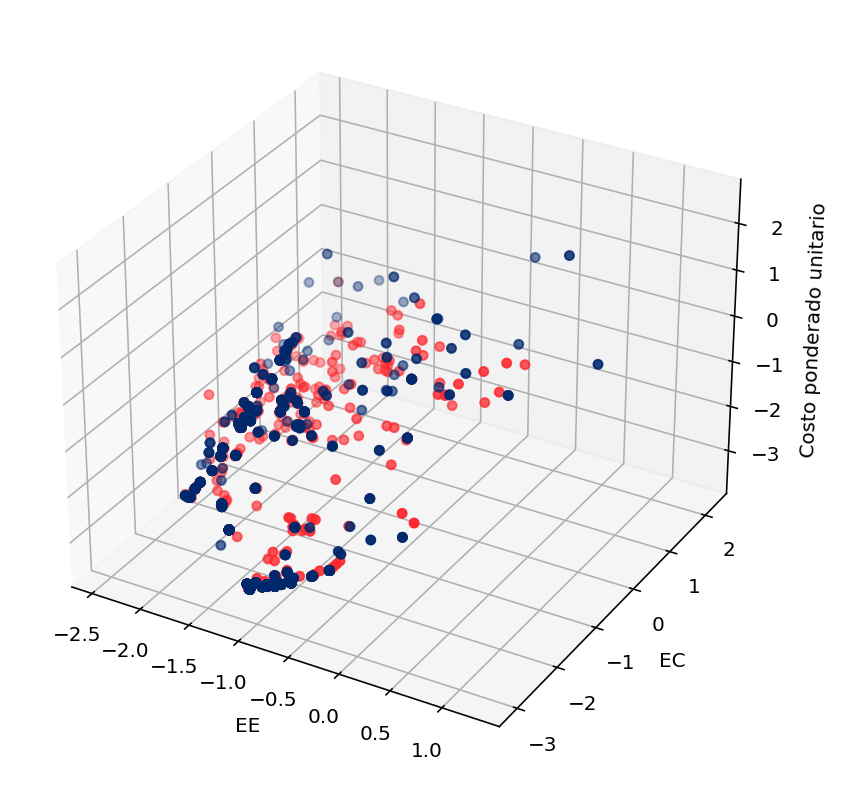

In [188]:
fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.scatter(xr, yr, zr, c ='#00286d', marker='o')
bx.scatter(xe, ye, ze, c = '#fd292f', marker = 'o')

bx.set_xlabel('EE')
bx.set_ylabel('EC')
bx.set_zlabel('Costo ponderado unitario')

plt.show()

In [189]:
rand_lay = go.Layout(
    title='Visualización de errores',
    scene=dict(
        xaxis=dict(
            title='EE'
        ),
        yaxis=dict(
            title='EC'
        ),
        zaxis=dict(
            title='Costo ponderado unitario'
        )
    )
)
fig = go.Figure(layout=rand_lay)

fig.add_trace(go.Scatter3d(x=xr, y=yr, z=zr, mode='markers',name='Real',marker=dict(color='#00286d')))
fig.add_trace(go.Scatter3d(x=xe, y=ye, z=ze, mode='markers',name='Predición',marker=dict(color='#fd292f')))

fig.show()

In [190]:
Regressor= make_dataclass("Regressor", [("Regresor", str), ("Puntaje_r2", float), ('MSE', float), ('MAE', float)])
puntajes = pd.DataFrame([Regressor('Regresión lineal múltiple', lrr2, lrme, lrma), Regressor('Árbol de decisión', dtr2, dtme, dtma), Regressor('Random forest', rfr2, rfme, rfma), Regressor('XGBRegressor', xgbr2, xgbme, xgbma)])
puntajes = puntajes.sort_values(by = 'Puntaje_r2', ascending= False)

In [191]:
puntajes.head()

Regresor  Puntaje_r2       MSE       MAE
2              Random forest    0.938466  0.048395  0.050461
3               XGBRegressor    0.931304  0.054540  0.044027
1          Árbol de decisión    0.905009  0.088240  0.042925
0  Regresión lineal múltiple    0.152126  0.940262  0.759255

<AxesSubplot:xlabel='Puntaje_r2', ylabel='Regresor'>

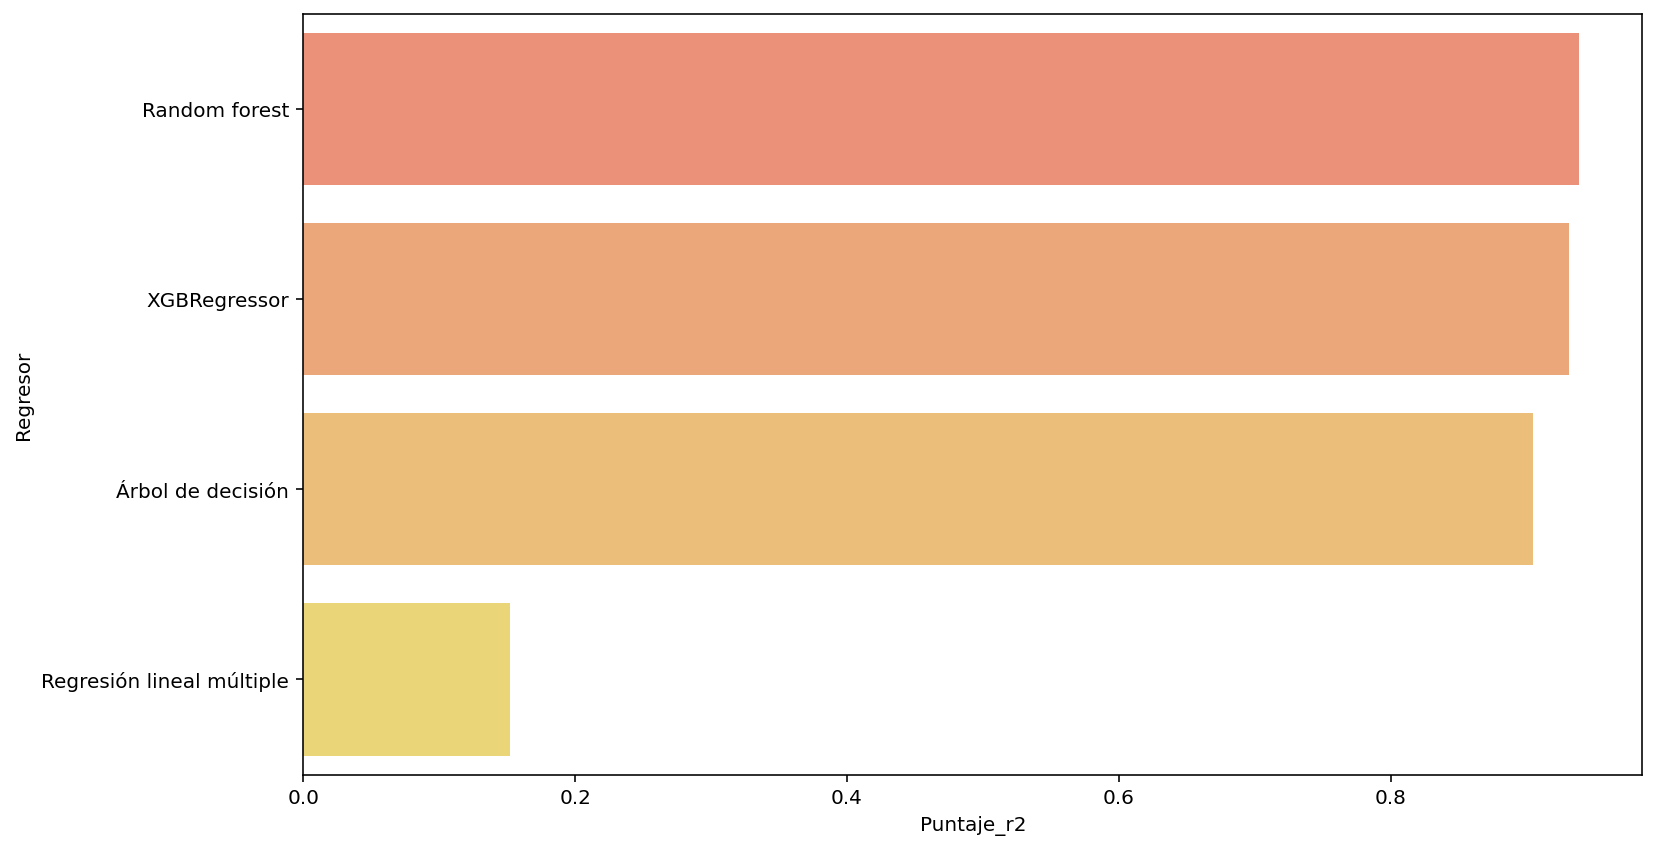

In [192]:
sns.barplot(data = puntajes, x='Puntaje_r2', y = 'Regresor', palette = 'autumn', alpha =0.6)

<AxesSubplot:xlabel='MSE', ylabel='Regresor'>

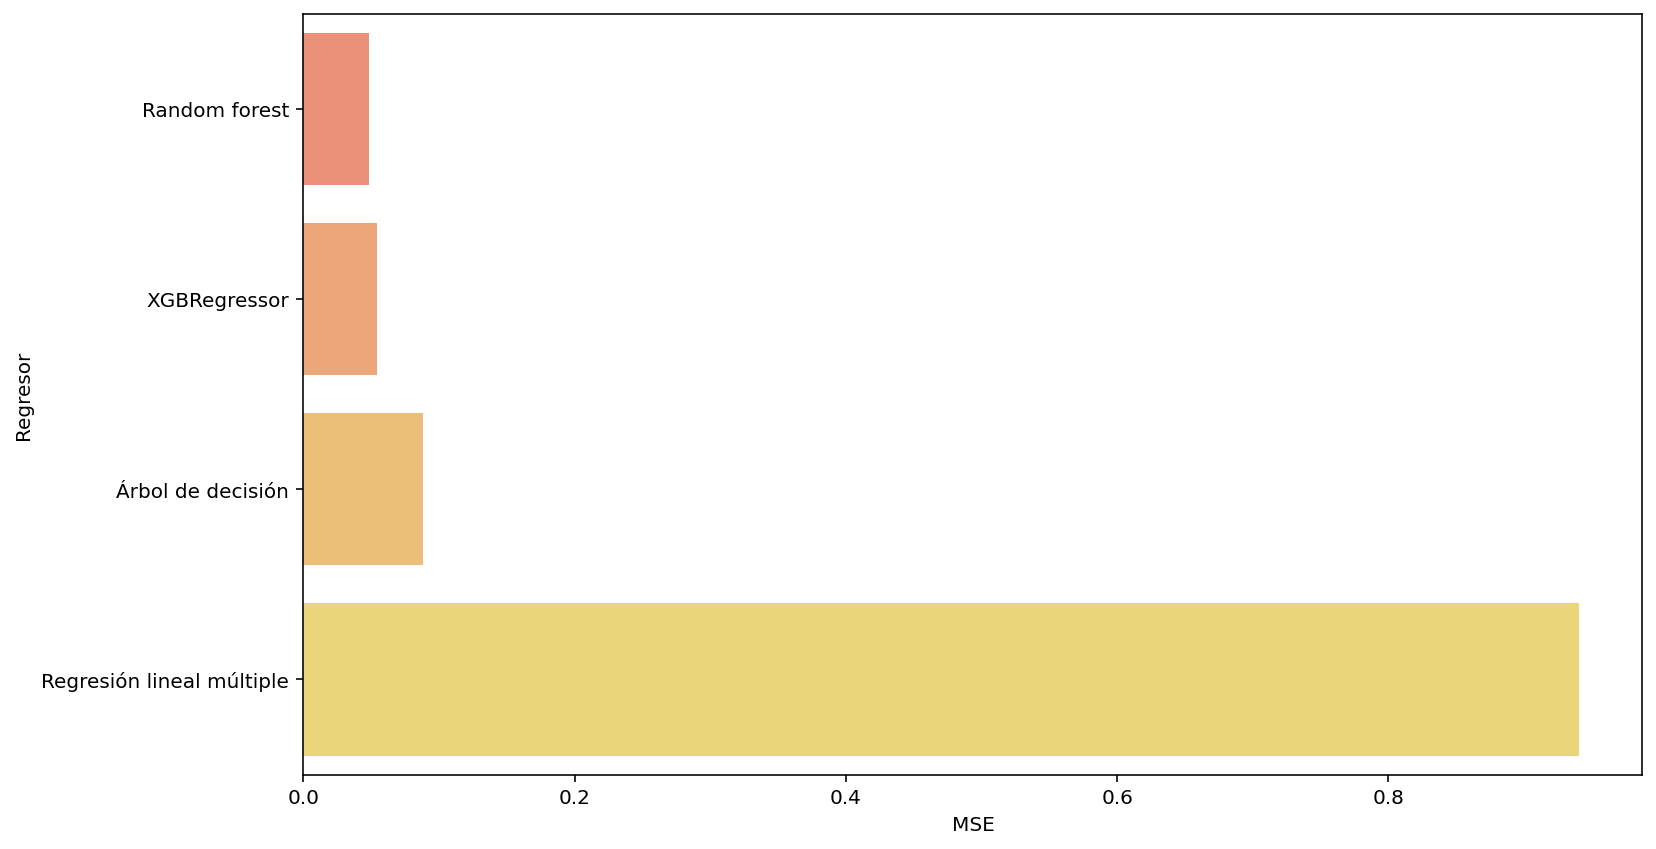

In [193]:
puntajes = puntajes.sort_values(by = 'MSE')
sns.barplot(data = puntajes, x='MSE', y = 'Regresor', palette = 'autumn', alpha =0.6)

<AxesSubplot:xlabel='MAE', ylabel='Regresor'>

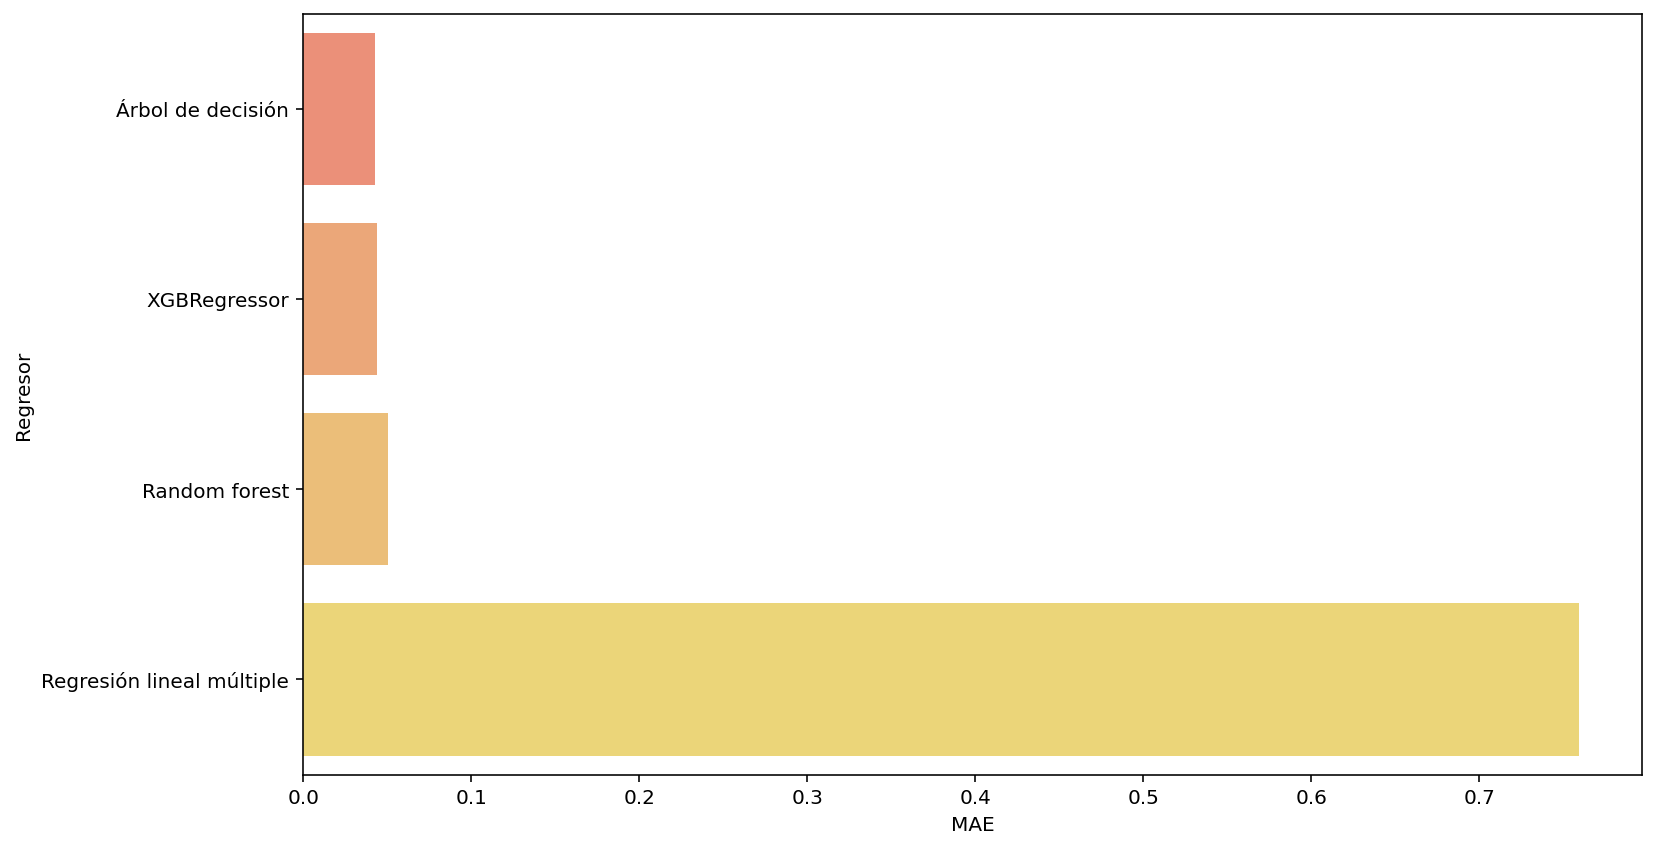

In [194]:
puntajes = puntajes.sort_values(by = 'MAE')
sns.barplot(data = puntajes, x='MAE', y = 'Regresor', palette = 'autumn', alpha =0.6)

Dada la dificultad de desestandarizar los resultados y la minúscula mejoría del modelo entrenado con estos, continuaremos con el modelo que se entrenó con los datos sin estandarizar. Específicamente el modelo de random forest.

In [195]:
df2.head()

cartesian  Calidad  Dureza    EC  EC_op    EE  EE_op       TIME  Tasa_Prod  \
0  (0, 0, 1)    0.045    98.0  24.8   13.2   9.4   18.2 2000-07-08        290   
1  (0, 0, 1)    0.032    98.0  13.2   13.2  18.2   18.2 2007-12-04        298   
2  (0, 0, 1)    0.031    98.0   7.1   13.2  23.6   18.2 2007-04-24        299   
3  (0, 0, 4)    0.043    99.0  20.0   24.1  21.6    0.0 1995-02-04        379   
4  (0, 0, 4)    0.038    99.0  24.5   24.1  17.9    0.0 2000-06-28        372   

   costo_op  costo_pon_op  costo_pon_un  costo_ponderado  suma  
0  0.093144       27.7568      0.094328          27.3552  31.4  
1  0.093144       27.7568      0.093144          27.7568  31.4  
2  0.093144       27.7568      0.096122          28.7404  31.4  
3  0.045676       17.4484      0.095198          36.0800  24.1  
4  0.045676       17.4484      0.095801          35.6380  24.1

Se utiliza el regresor seleccionado (random forest) para calcular el óptimo de cada registro en df2.

In [196]:
#Random Forest
x=df2['Calidad']
y=df2['Dureza']
z=df2['Tasa_Prod']

lista=[]
for i in df2.index:
    pred = np.array([x[i],y[i],z[i]])
    pred = pred.reshape(1, -1)
    cost=regressorPro.predict(pred)[0][2]
    lista.append(cost)
print(lista)

KeyboardInterrupt: 

Se agregan los óptimos a df2.

In [ ]:
numpy_data = np.array(lista)
dfr = pd.DataFrame(data=numpy_data, columns=["Costo_reg"])

In [ ]:
df2['costo_reg'] = dfr
df2.head()

Se calcula el ahorro unitario y el ahorro total.

In [ ]:
df2=df2.assign(ahorro_un=lambda row: (row['costo_pon_un']-row['costo_reg']))
df2=df2.assign(costo_prom_reg=lambda row: (row['Tasa_Prod']*row['costo_reg']))
df2=df2.assign(ahorro=lambda row: (row['costo_ponderado']-row['costo_prom_reg']))

In [ ]:
df2.head()

Promedio del ahorro unitario.

In [ ]:
df2['ahorro_un'].mean()

Promedio del ahorro total.

In [ ]:
df2['ahorro'].mean()

Se crea clase "Regresor" para serializar el regresor seleccionado.

In [ ]:
class Regresor:
    def __init__(self, regresor):
        self.regressor = regresor
        
    def calculaOptimo(self, datos_entrada):
        datos = np.array(datos_entrada)
        datos = datos.reshape(1, -1)
        datos_salida = self.regressor.predict(datos)
        return datos_salida
    
    def imprimeOptimo(self, datos_entrada):
        datos = np.array(datos_entrada)
        datos = datos.reshape(1, -1)
        EE = self.regressor.predict(datos)[0][0]
        EC = self.regressor.predict(datos)[0][1]
        cost = self.regressor.predict(datos)[0][2]
        print('EE: %s\nEC: %s\nCosto Ponderado unitario: %s'% (EE,EC,cost))

Se instancia la clase con el regresor de random forest.

In [ ]:
reg = Regresor(regressorPro)

Se crea documento para almacenar el objeto serializado.

In [ ]:
objectRepository = open("ObjectFile.picl","wb")

Se serializa el objeto, se almacena en el archivo y se cierra.

In [ ]:
pickle.dump(reg, objectRepository, protocol = pickle.HIGHEST_PROTOCOL)
objectRepository.close()